# Active Learning with Partially Bayesian Neural Networks

This notebook compares active learning with a standard Gaussian process (GP) and with a partially Bayesian neural network (PBNN) on a dataset with discontinuities and non-stationarities.

## Imports

In [1]:
import sys
sys.path.append("..")

import neurobayes as nb

import numpy as np
import matplotlib.pyplot as plt

# Uncomment the next two lines to set default precision to 'double' for stability/robustness
# import jax
# jax.config.update("jax_enable_x64", True)

## Data

Create a measurement function and view the ground truth:

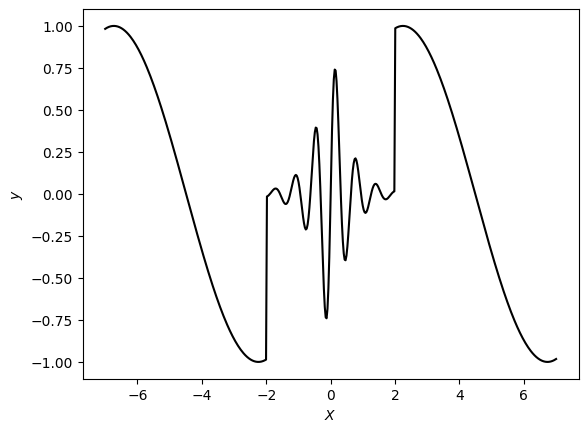

In [2]:
(x_start, x_stop), fn = nb.genfunc.nonstationary2()

measure = lambda x: fn(x) + np.random.normal(0, 0.02, size=len(x))

X_domain = np.linspace(x_start, x_stop, 500)
y_true = fn(X_domain)

plt.plot(X_domain, y_true, c='k')
plt.xlabel("$X$")
plt.ylabel("$y$");

## GP-based active learning

Run standard Gaussian process-based active learning:

step 1


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1947.07it/s, 7 steps of size 4.62e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.23      1.35      0.87      0.08      2.49    612.92      1.00
    k_scale      1.07      1.02      0.79      0.04      2.17    585.82      1.00
      noise      0.75      0.53      0.66      0.00      1.46    686.71      1.01



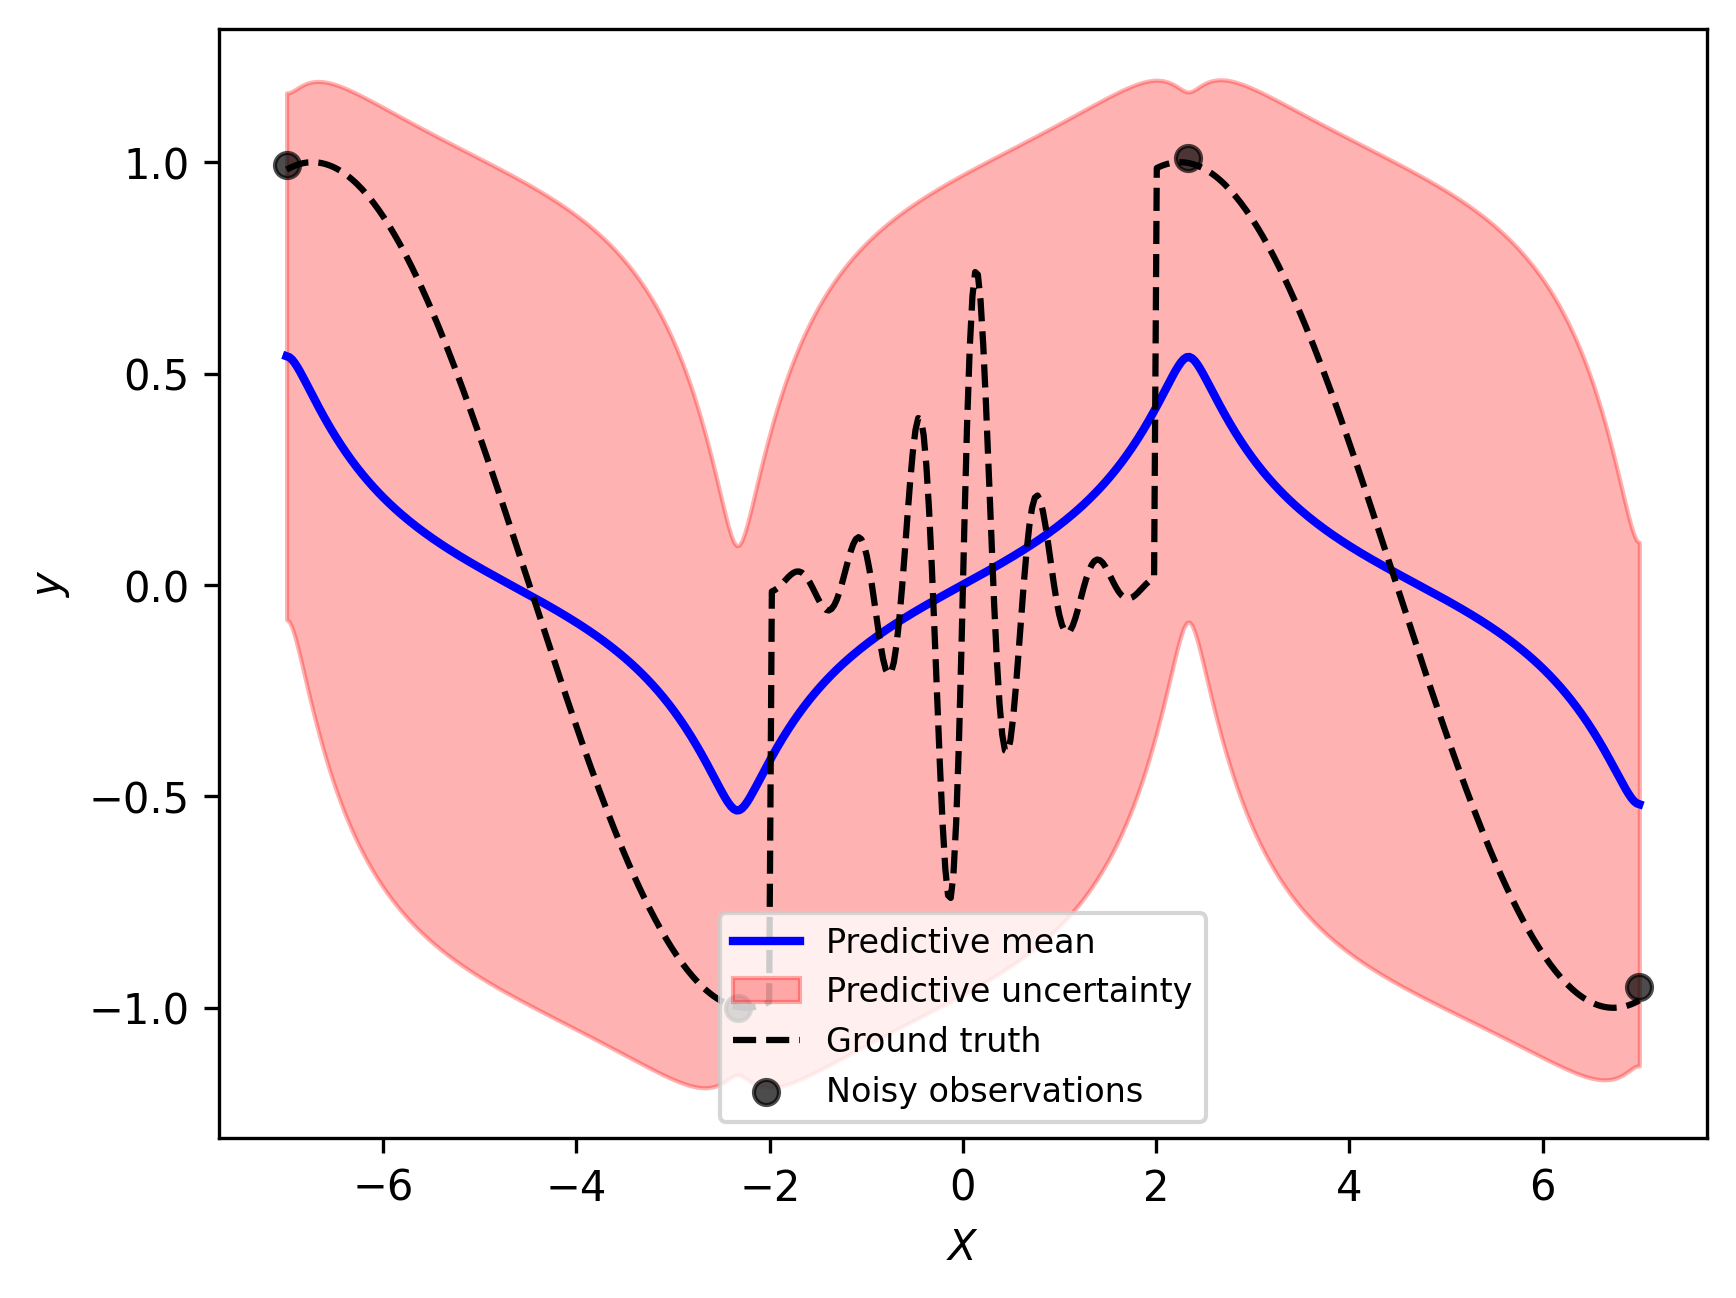

step 2


sample: 100%|██████████| 2000/2000 [00:00<00:00, 2113.31it/s, 7 steps of size 5.02e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.23      1.28      0.88      0.07      2.41    643.79      1.00
    k_scale      0.94      0.86      0.69      0.07      1.95    649.52      1.01
      noise      0.68      0.47      0.59      0.00      1.34    580.11      1.01

step 3


sample: 100%|██████████| 2000/2000 [00:00<00:00, 2151.75it/s, 7 steps of size 5.18e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.29      1.37      0.90      0.06      2.72    407.37      1.00
    k_scale      0.77      0.66      0.57      0.05      1.59    740.64      1.00
      noise      0.60      0.46      0.51      0.00      1.16    650.86      1.01

step 4


sample: 100%|██████████| 2000/2000 [00:00<00:00, 2104.28it/s, 7 steps of size 5.05e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.41      1.53      0.94      0.07      2.99    556.78      1.00
    k_scale      0.73      0.64      0.54      0.05      1.46    585.91      1.00
      noise      0.51      0.41      0.42      0.00      1.10    581.18      1.01

step 5


sample: 100%|██████████| 2000/2000 [00:00<00:00, 2105.34it/s, 7 steps of size 4.36e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.34      1.40      0.92      0.09      2.88    455.16      1.00
    k_scale      0.63      0.52      0.49      0.04      1.18    611.53      1.00
      noise      0.47      0.35      0.40      0.00      0.93    850.90      1.00



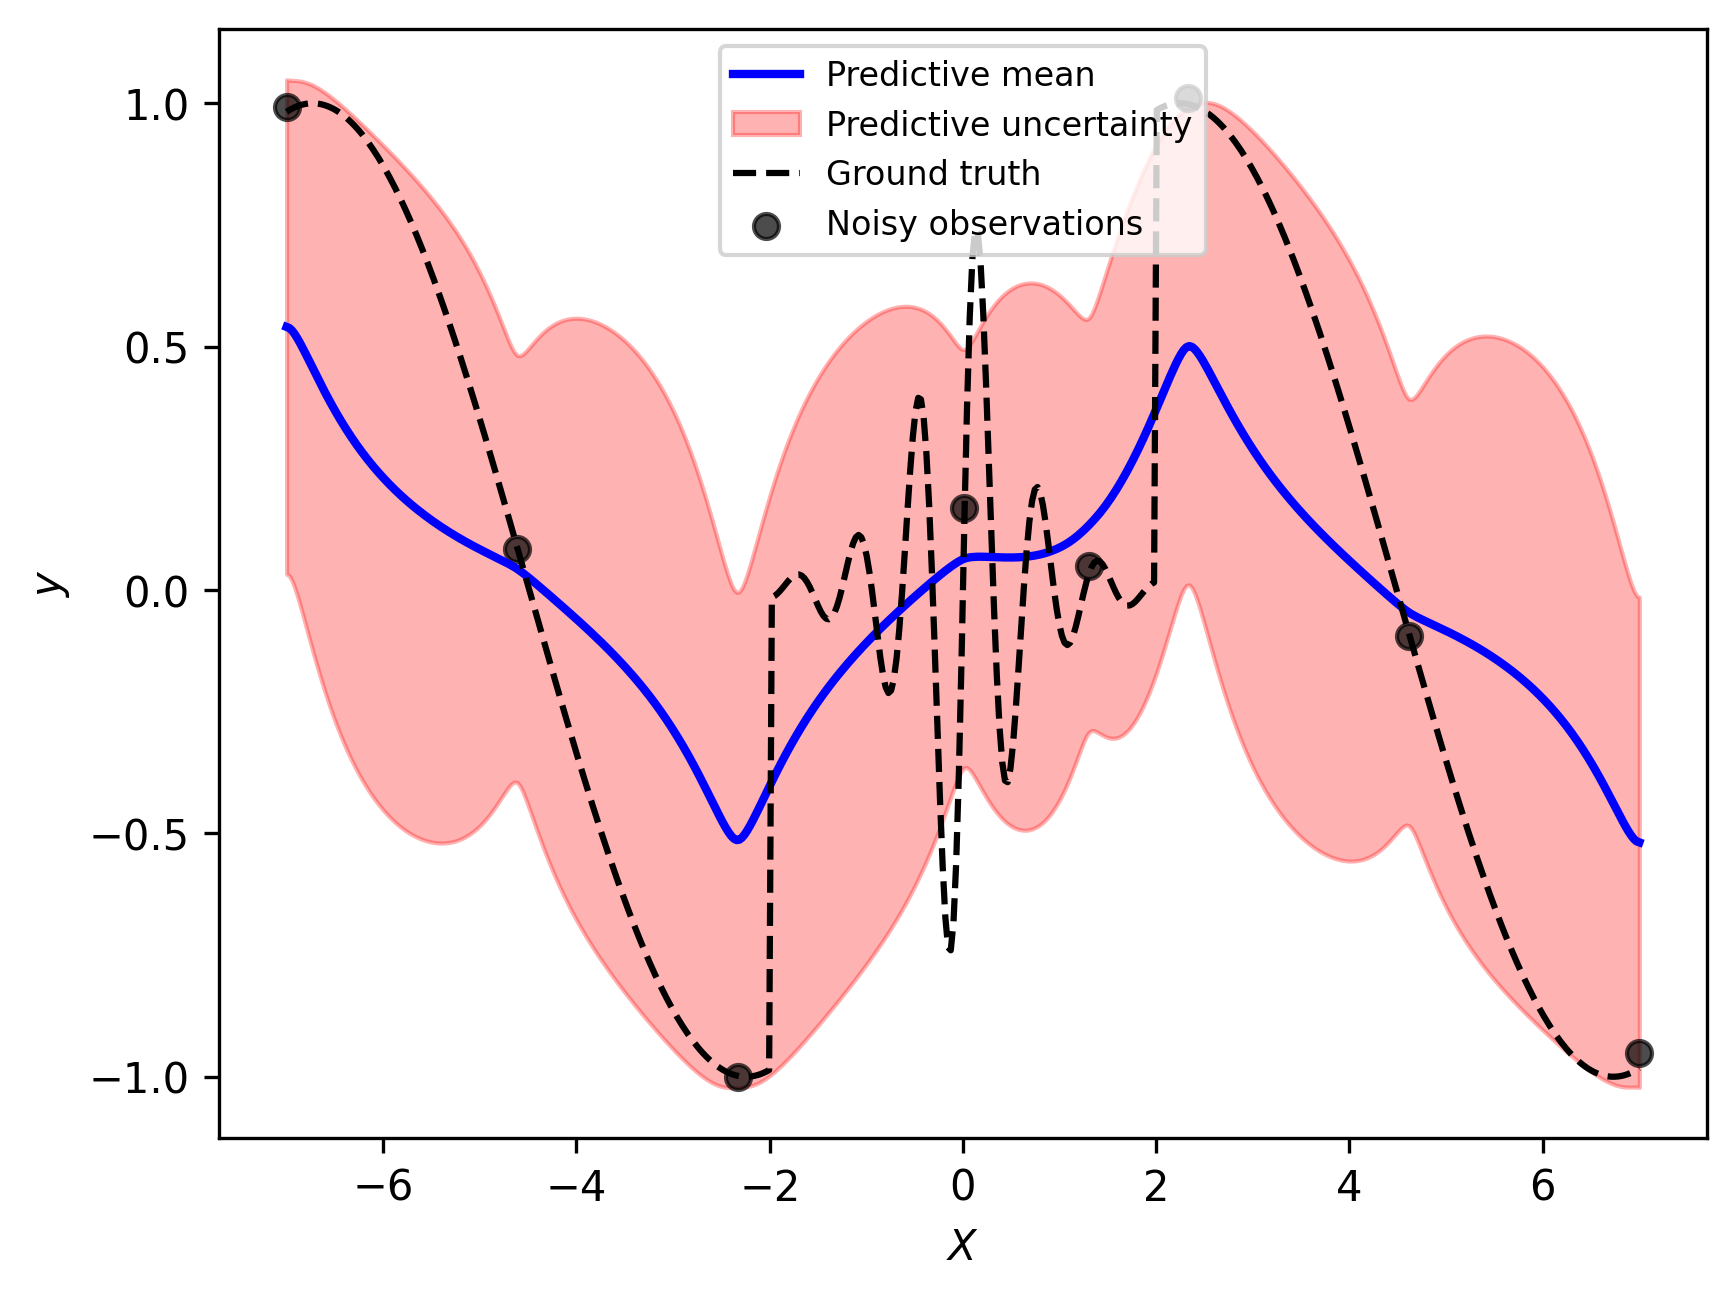

step 6


sample: 100%|██████████| 2000/2000 [00:00<00:00, 2070.47it/s, 7 steps of size 4.86e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.49      1.45      1.11      0.13      3.07    643.40      1.00
    k_scale      0.63      0.53      0.50      0.05      1.20    574.41      1.01
      noise      0.42      0.33      0.33      0.00      0.86    848.49      1.00

step 7


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1852.44it/s, 7 steps of size 4.36e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.65      1.55      1.28      0.10      3.20    547.15      1.00
    k_scale      0.64      0.49      0.52      0.05      1.19    582.71      1.01
      noise      0.34      0.30      0.26      0.00      0.75    600.59      1.00

step 8


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1984.30it/s, 7 steps of size 3.80e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.79      1.37      1.52      0.16      3.15    364.29      1.00
    k_scale      0.68      0.51      0.56      0.08      1.29    393.83      1.01
      noise      0.28      0.27      0.19      0.00      0.61    560.03      1.00

step 9


sample: 100%|██████████| 2000/2000 [00:00<00:00, 2027.66it/s, 5 steps of size 4.42e-01. acc. prob=0.92]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.89      1.11      1.75      0.17      3.25    533.75      1.00
    k_scale      0.70      0.53      0.58      0.11      1.27    462.73      1.01
      noise      0.20      0.21      0.13      0.00      0.52    520.89      1.00

step 10


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1772.92it/s, 7 steps of size 4.27e-01. acc. prob=0.92]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.85      1.07      1.65      0.25      3.18    466.66      1.00
    k_scale      0.68      0.57      0.53      0.14      1.27    309.89      1.00
      noise      0.18      0.19      0.12      0.00      0.43    738.21      1.00



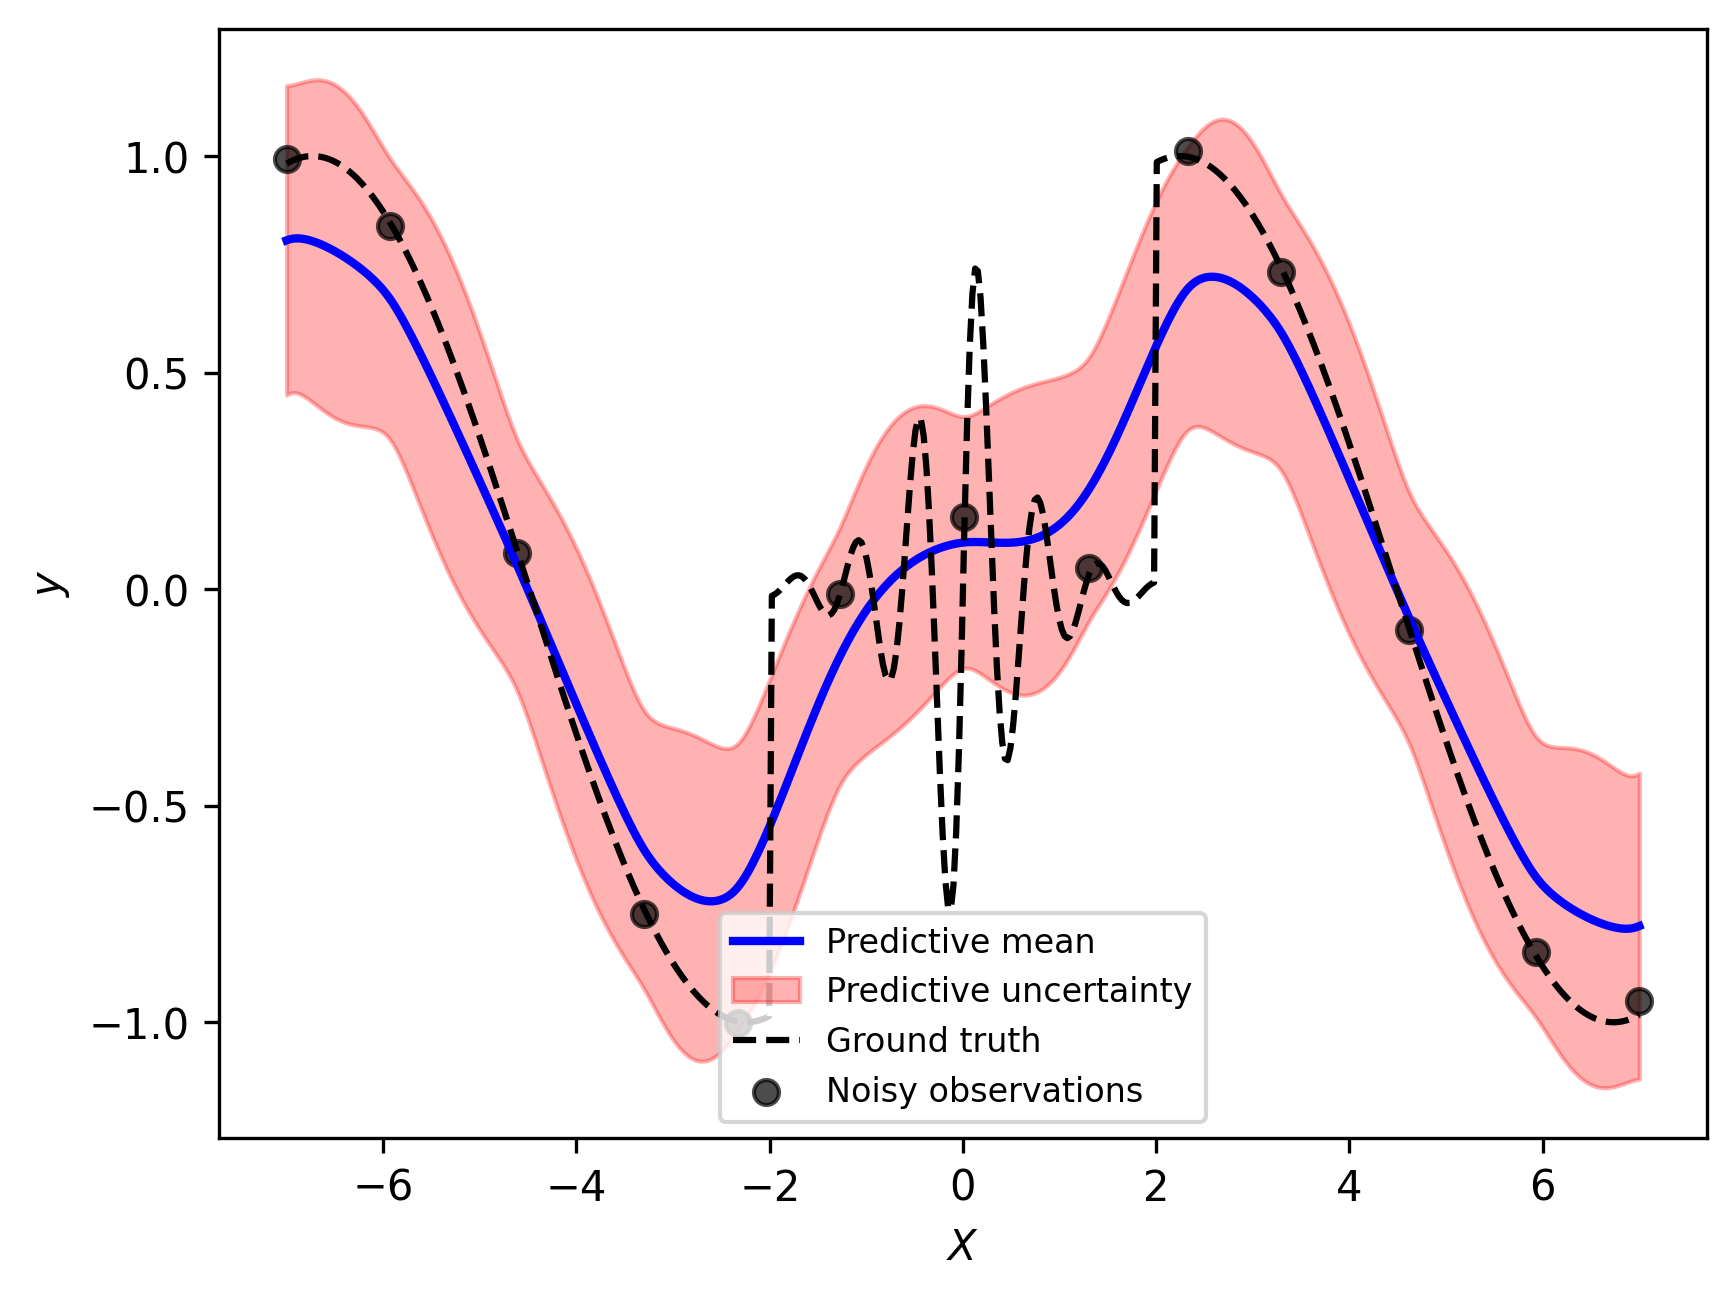

step 11


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1967.55it/s, 7 steps of size 4.07e-01. acc. prob=0.92]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.89      0.89      1.73      0.55      3.09    443.76      1.01
    k_scale      0.72      0.54      0.56      0.13      1.33    398.20      1.01
      noise      0.11      0.12      0.08      0.00      0.25    598.75      1.00

step 12


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1909.40it/s, 3 steps of size 4.02e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.00      0.92      1.85      0.68      3.27    452.52      1.01
    k_scale      0.73      0.59      0.57      0.17      1.37    443.50      1.00
      noise      0.10      0.09      0.07      0.00      0.21    676.58      1.00

step 13


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1866.00it/s, 7 steps of size 4.42e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.01      0.81      1.87      0.82      3.16    442.27      1.00
    k_scale      0.75      0.59      0.60      0.18      1.38    349.15      1.00
      noise      0.07      0.08      0.05      0.00      0.15    797.33      1.00

step 14


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1886.19it/s, 7 steps of size 4.55e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.04      0.76      1.93      0.80      3.04    499.31      1.02
    k_scale      0.73      0.50      0.57      0.18      1.38    430.66      1.01
      noise      0.06      0.05      0.04      0.00      0.12    810.94      1.00

step 15


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1854.12it/s, 7 steps of size 5.12e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.09      0.73      1.99      0.99      3.17    503.56      1.01
    k_scale      0.75      0.54      0.59      0.19      1.40    406.98      1.01
      noise      0.04      0.04      0.03      0.00      0.09    665.34      1.00



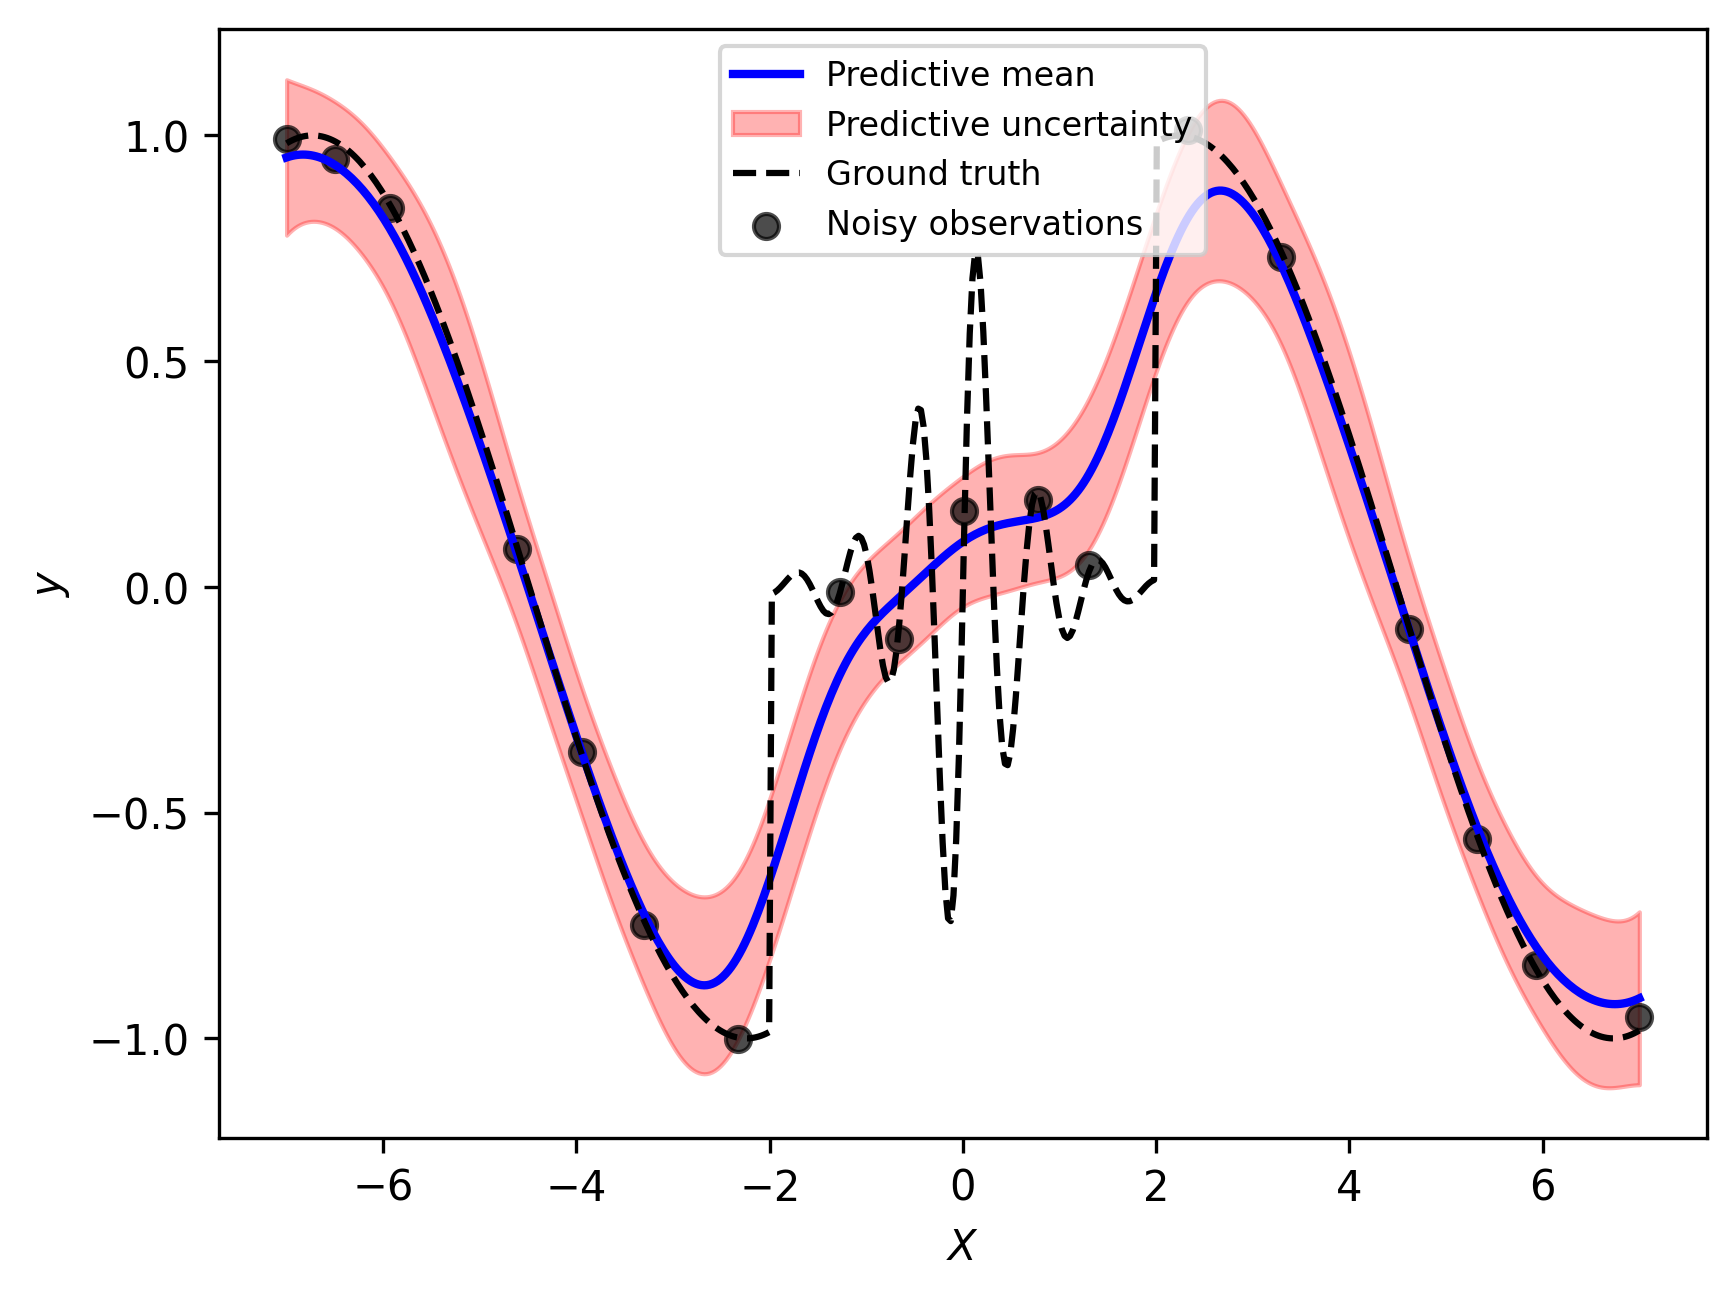

step 16


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1743.36it/s, 7 steps of size 5.08e-01. acc. prob=0.92]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.09      0.72      2.00      0.92      3.04    462.80      1.01
    k_scale      0.74      0.50      0.60      0.20      1.33    479.22      1.01
      noise      0.04      0.03      0.03      0.00      0.07    855.42      1.00

step 17


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1821.55it/s, 7 steps of size 4.37e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.05      0.67      1.95      0.99      2.98    429.13      1.00
    k_scale      0.75      0.52      0.61      0.21      1.35    453.13      1.00
      noise      0.03      0.03      0.02      0.00      0.06    735.58      1.00

step 18


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1762.94it/s, 7 steps of size 4.24e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.01      0.63      1.92      1.05      2.87    409.21      1.01
    k_scale      0.75      0.49      0.61      0.20      1.31    359.04      1.00
      noise      0.02      0.02      0.02      0.00      0.05    861.09      1.00

step 19


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1730.03it/s, 7 steps of size 3.64e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.93      0.55      1.84      1.11      2.77    436.24      1.01
    k_scale      0.73      0.48      0.59      0.19      1.29    474.69      1.00
      noise      0.02      0.01      0.01      0.00      0.03    673.03      1.00

step 20


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1710.08it/s, 7 steps of size 4.02e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.90      0.52      1.83      1.13      2.70    408.51      1.00
    k_scale      0.70      0.46      0.58      0.22      1.25    429.87      1.00
      noise      0.01      0.01      0.01      0.00      0.03    667.24      1.00



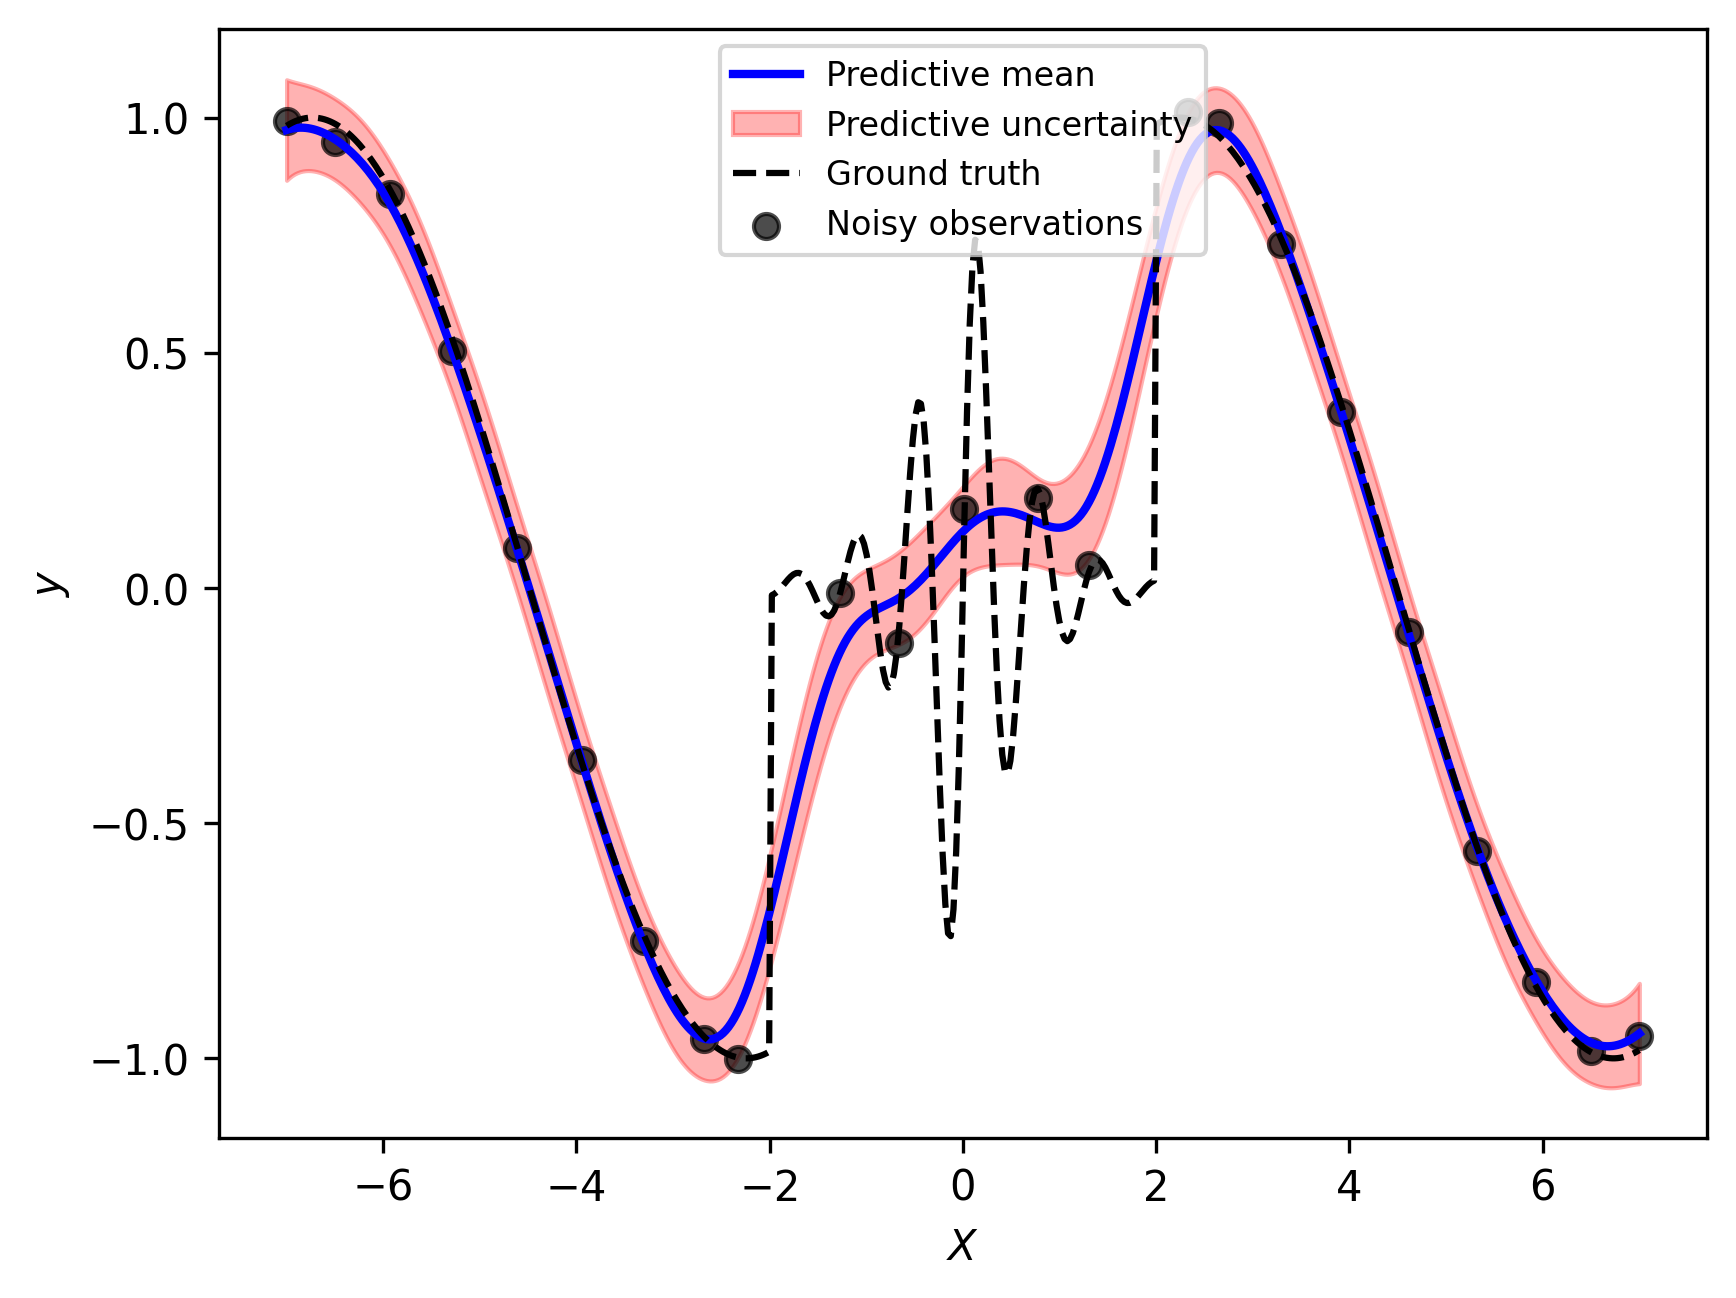

step 21


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1786.23it/s, 7 steps of size 4.21e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.73      0.47      1.68      1.06      2.51    469.12      1.01
    k_scale      0.67      0.39      0.56      0.19      1.13    523.97      1.00
      noise      0.02      0.02      0.01      0.00      0.04    705.43      1.00

step 22


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1727.31it/s, 7 steps of size 4.47e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.61      0.48      1.54      0.86      2.31    439.36      1.01
    k_scale      0.66      0.44      0.54      0.21      1.16    402.30      1.00
      noise      0.03      0.02      0.02      0.00      0.05    557.05      1.01

step 23


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1688.44it/s, 7 steps of size 4.82e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.92      0.60      1.83      0.97      2.79    505.66      1.01
    k_scale      0.74      0.52      0.60      0.15      1.34    384.60      1.01
      noise      0.05      0.02      0.04      0.02      0.08    699.73      1.01

step 24


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1684.35it/s, 7 steps of size 4.02e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.86      0.57      1.80      0.98      2.73    472.42      1.00
    k_scale      0.72      0.53      0.58      0.19      1.22    355.29      1.00
      noise      0.04      0.02      0.04      0.02      0.07    778.80      1.00

step 25


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1685.68it/s, 7 steps of size 4.16e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.84      0.56      1.79      0.94      2.71    335.99      1.01
    k_scale      0.73      0.57      0.58      0.16      1.30    316.71      1.00
      noise      0.04      0.02      0.03      0.01      0.06    745.52      1.00



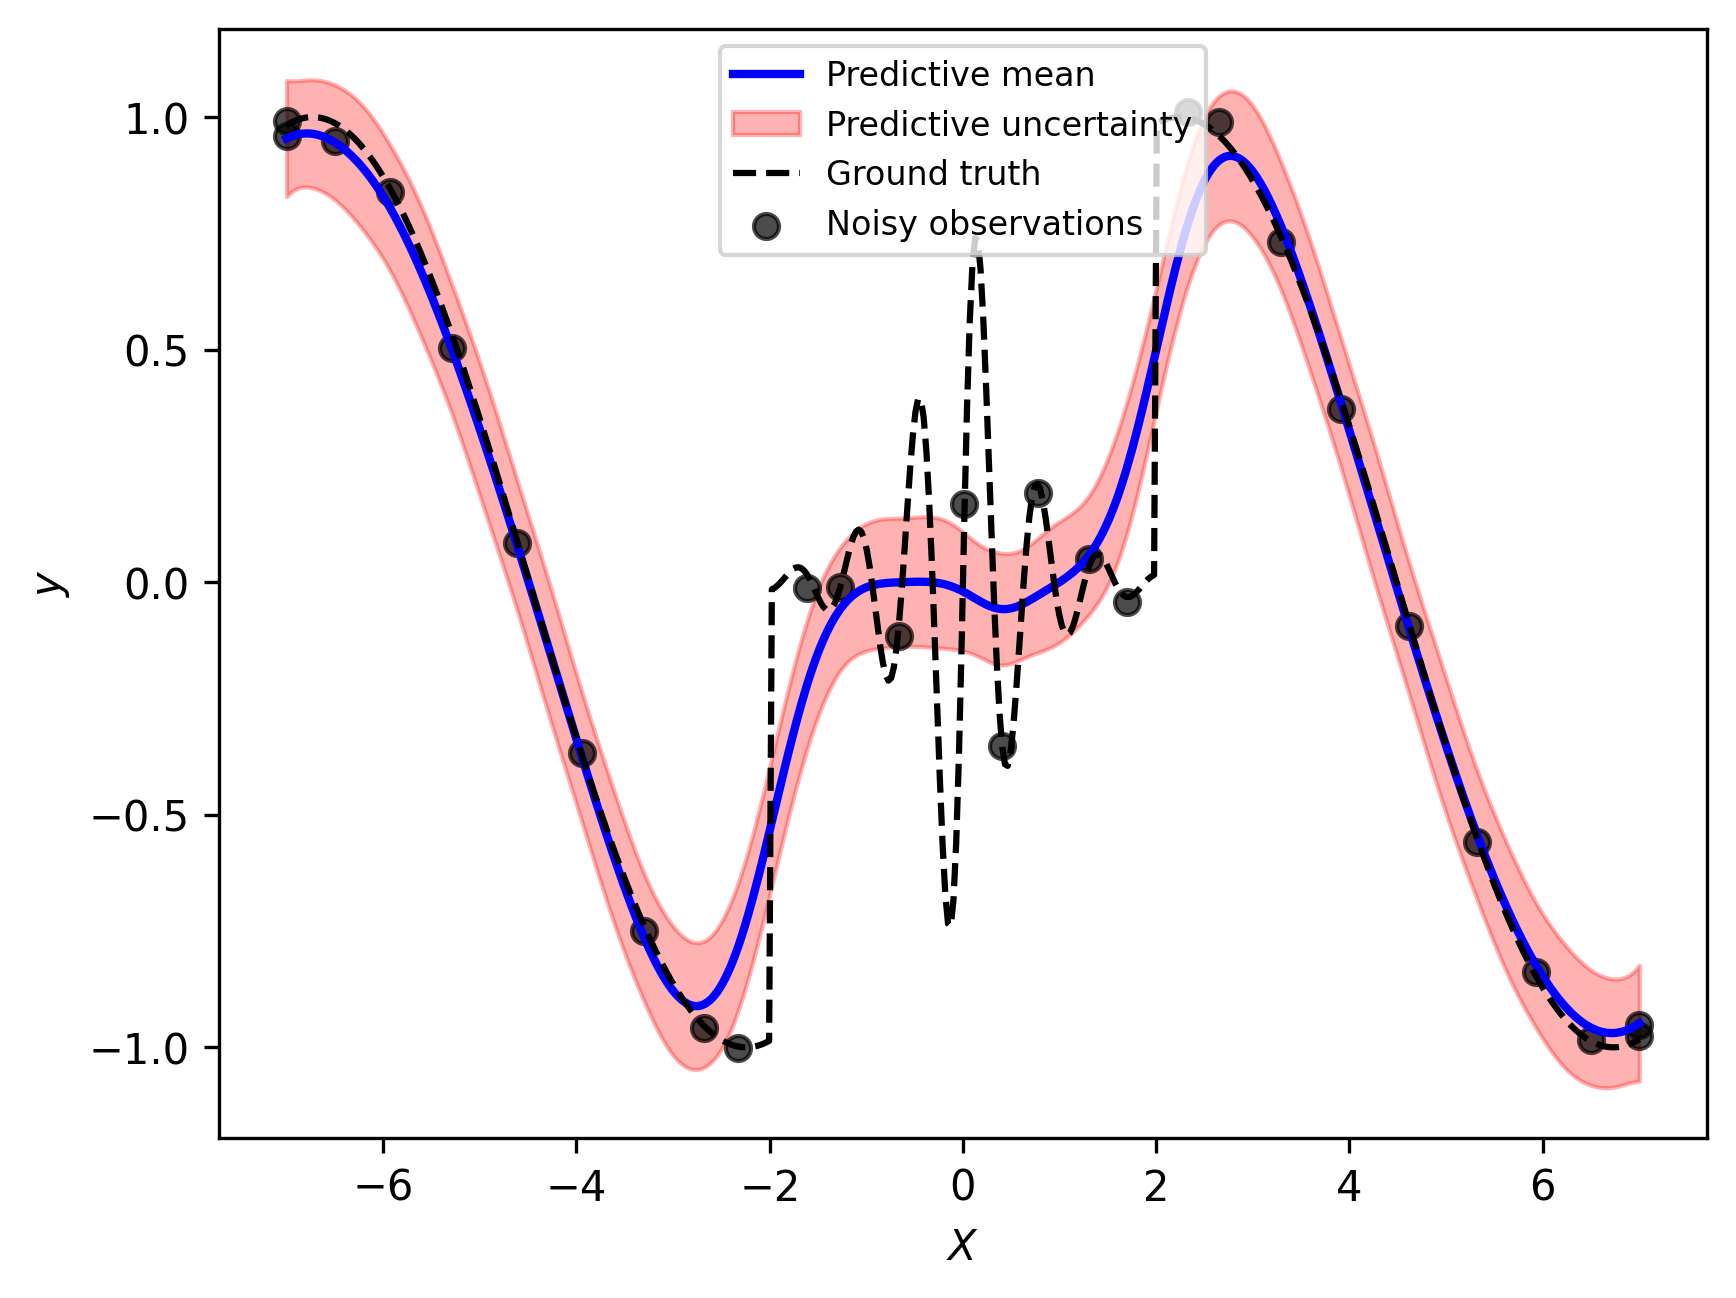

step 26


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1655.75it/s, 7 steps of size 4.36e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.84      0.56      1.79      0.99      2.71    322.92      1.01
    k_scale      0.71      0.48      0.61      0.19      1.21    395.36      1.01
      noise      0.04      0.02      0.03      0.01      0.06    599.24      1.00

step 27


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1257.67it/s, 7 steps of size 3.32e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.65      0.56      1.58      0.66      2.41    341.25      1.01
    k_scale      0.63      0.38      0.52      0.18      1.07    337.81      1.01
      noise      0.03      0.02      0.03      0.00      0.05    606.65      1.00

step 28


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1275.62it/s, 7 steps of size 4.89e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.74      0.54      1.67      0.97      2.58    504.08      1.02
    k_scale      0.67      0.44      0.56      0.17      1.17    479.42      1.01
      noise      0.04      0.02      0.04      0.02      0.07    808.87      1.00

step 29


sample: 100%|██████████| 2000/2000 [00:12<00:00, 163.55it/s, 7 steps of size 5.23e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.73      0.51      1.67      0.97      2.55    389.64      1.00
    k_scale      0.68      0.46      0.56      0.19      1.20    317.97      1.00
      noise      0.04      0.02      0.04      0.02      0.06    603.38      1.00

step 30


sample: 100%|██████████| 2000/2000 [00:09<00:00, 203.96it/s, 7 steps of size 5.44e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.70      0.50      1.61      1.01      2.52    419.23      1.00
    k_scale      0.66      0.46      0.54      0.19      1.16    466.73      1.00
      noise      0.04      0.02      0.03      0.01      0.06    530.57      1.00



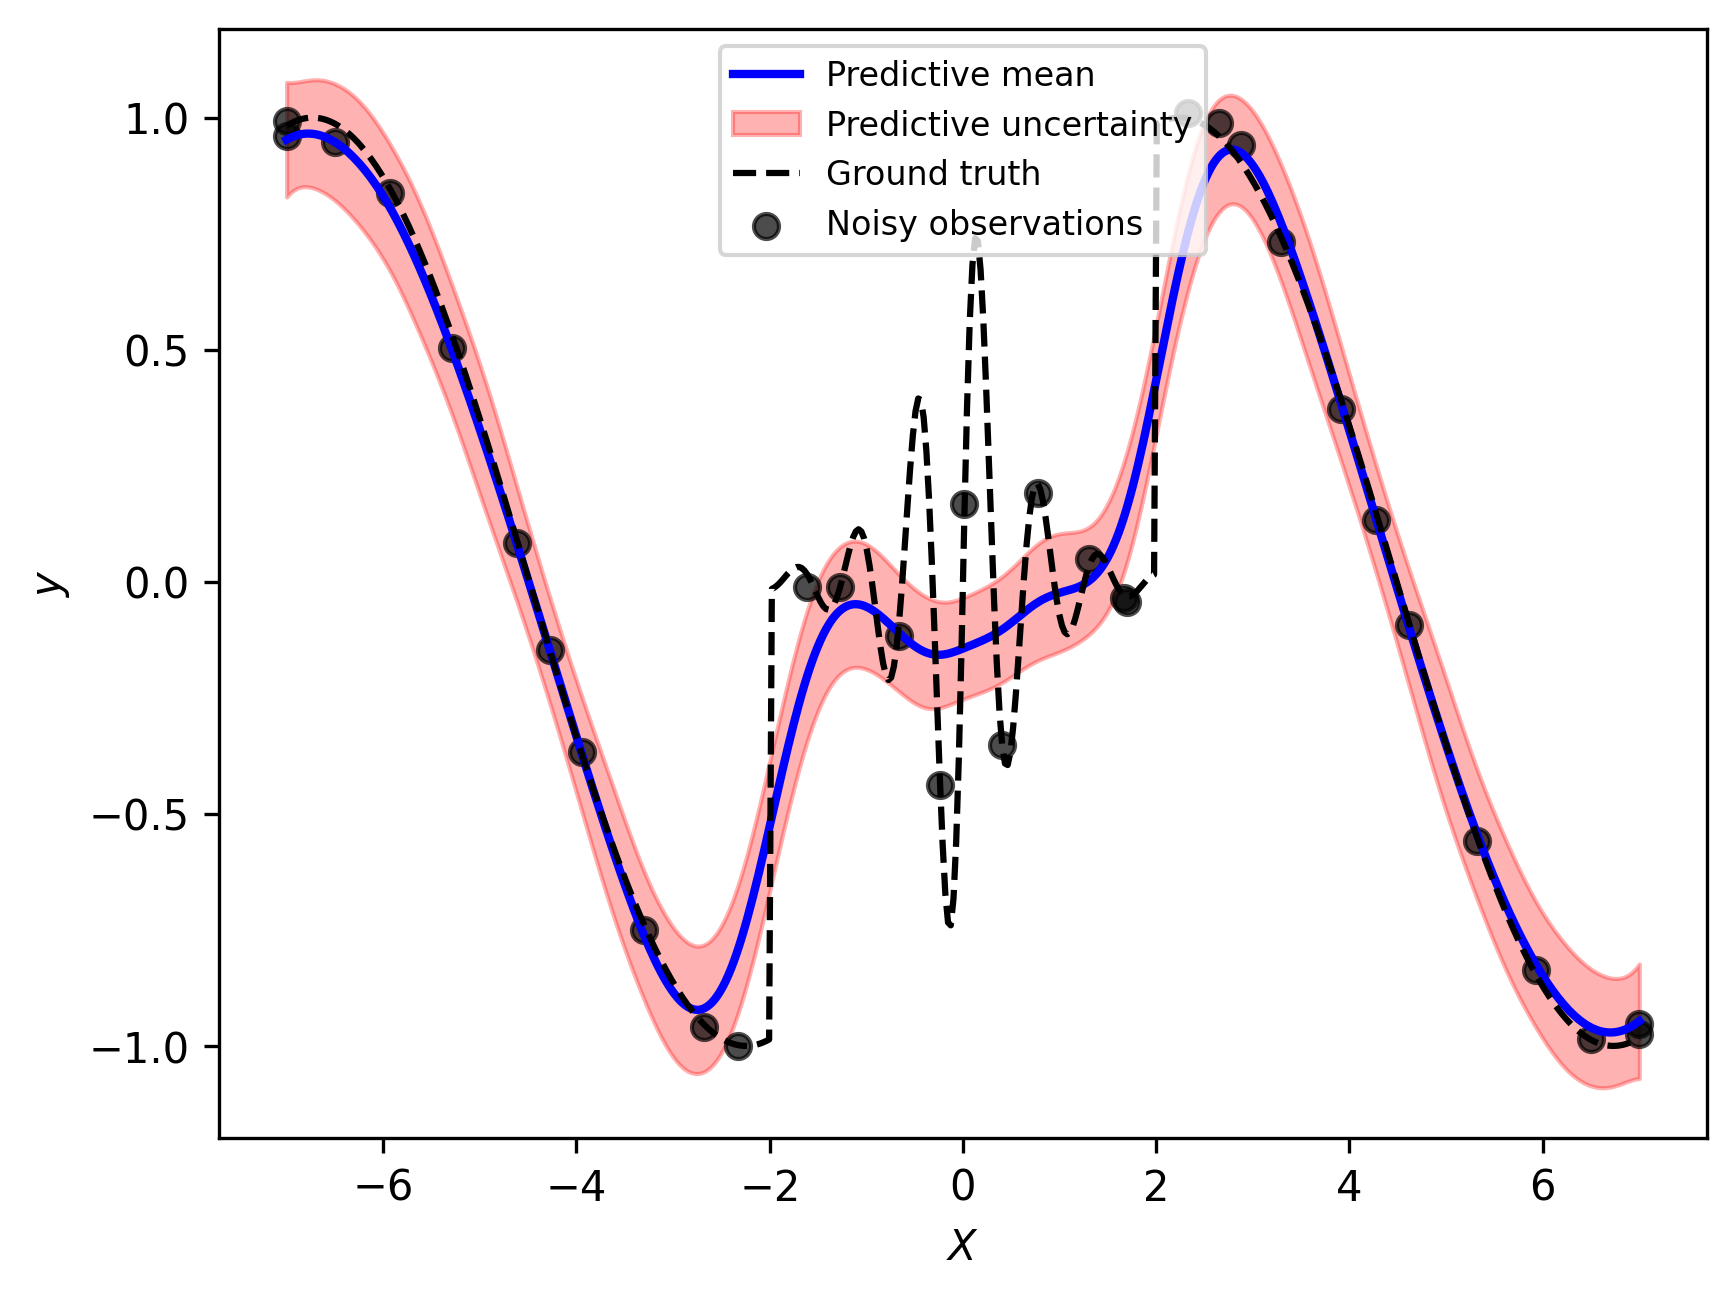

step 31


sample: 100%|██████████| 2000/2000 [00:08<00:00, 224.30it/s, 7 steps of size 5.27e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.72      0.49      1.67      0.97      2.46    353.81      1.00
    k_scale      0.69      0.45      0.57      0.19      1.23    351.37      1.00
      noise      0.03      0.01      0.03      0.01      0.05    617.95      1.00

step 32


sample: 100%|██████████| 2000/2000 [00:10<00:00, 185.50it/s, 3 steps of size 4.39e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.70      0.49      1.64      0.91      2.42    484.96      1.00
    k_scale      0.66      0.43      0.55      0.18      1.17    504.65      1.00
      noise      0.03      0.01      0.03      0.01      0.05    780.27      1.00

step 33


sample: 100%|██████████| 2000/2000 [00:10<00:00, 182.83it/s, 7 steps of size 5.64e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.65      0.48      1.59      0.90      2.33    350.18      1.00
    k_scale      0.66      0.43      0.54      0.18      1.13    304.35      1.00
      noise      0.03      0.01      0.03      0.01      0.05    713.41      1.00

step 34


sample: 100%|██████████| 2000/2000 [00:04<00:00, 454.65it/s, 7 steps of size 4.84e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.63      0.46      1.56      0.90      2.32    344.69      1.00
    k_scale      0.67      0.50      0.55      0.15      1.15    334.50      1.00
      noise      0.03      0.01      0.03      0.01      0.05    717.68      1.01

step 35


sample: 100%|██████████| 2000/2000 [00:04<00:00, 462.96it/s, 7 steps of size 3.84e-01. acc. prob=0.97] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.60      0.44      1.55      0.91      2.25    450.40      1.00
    k_scale      0.63      0.41      0.52      0.18      1.07    409.81      1.00
      noise      0.03      0.01      0.03      0.01      0.04    815.84      1.01



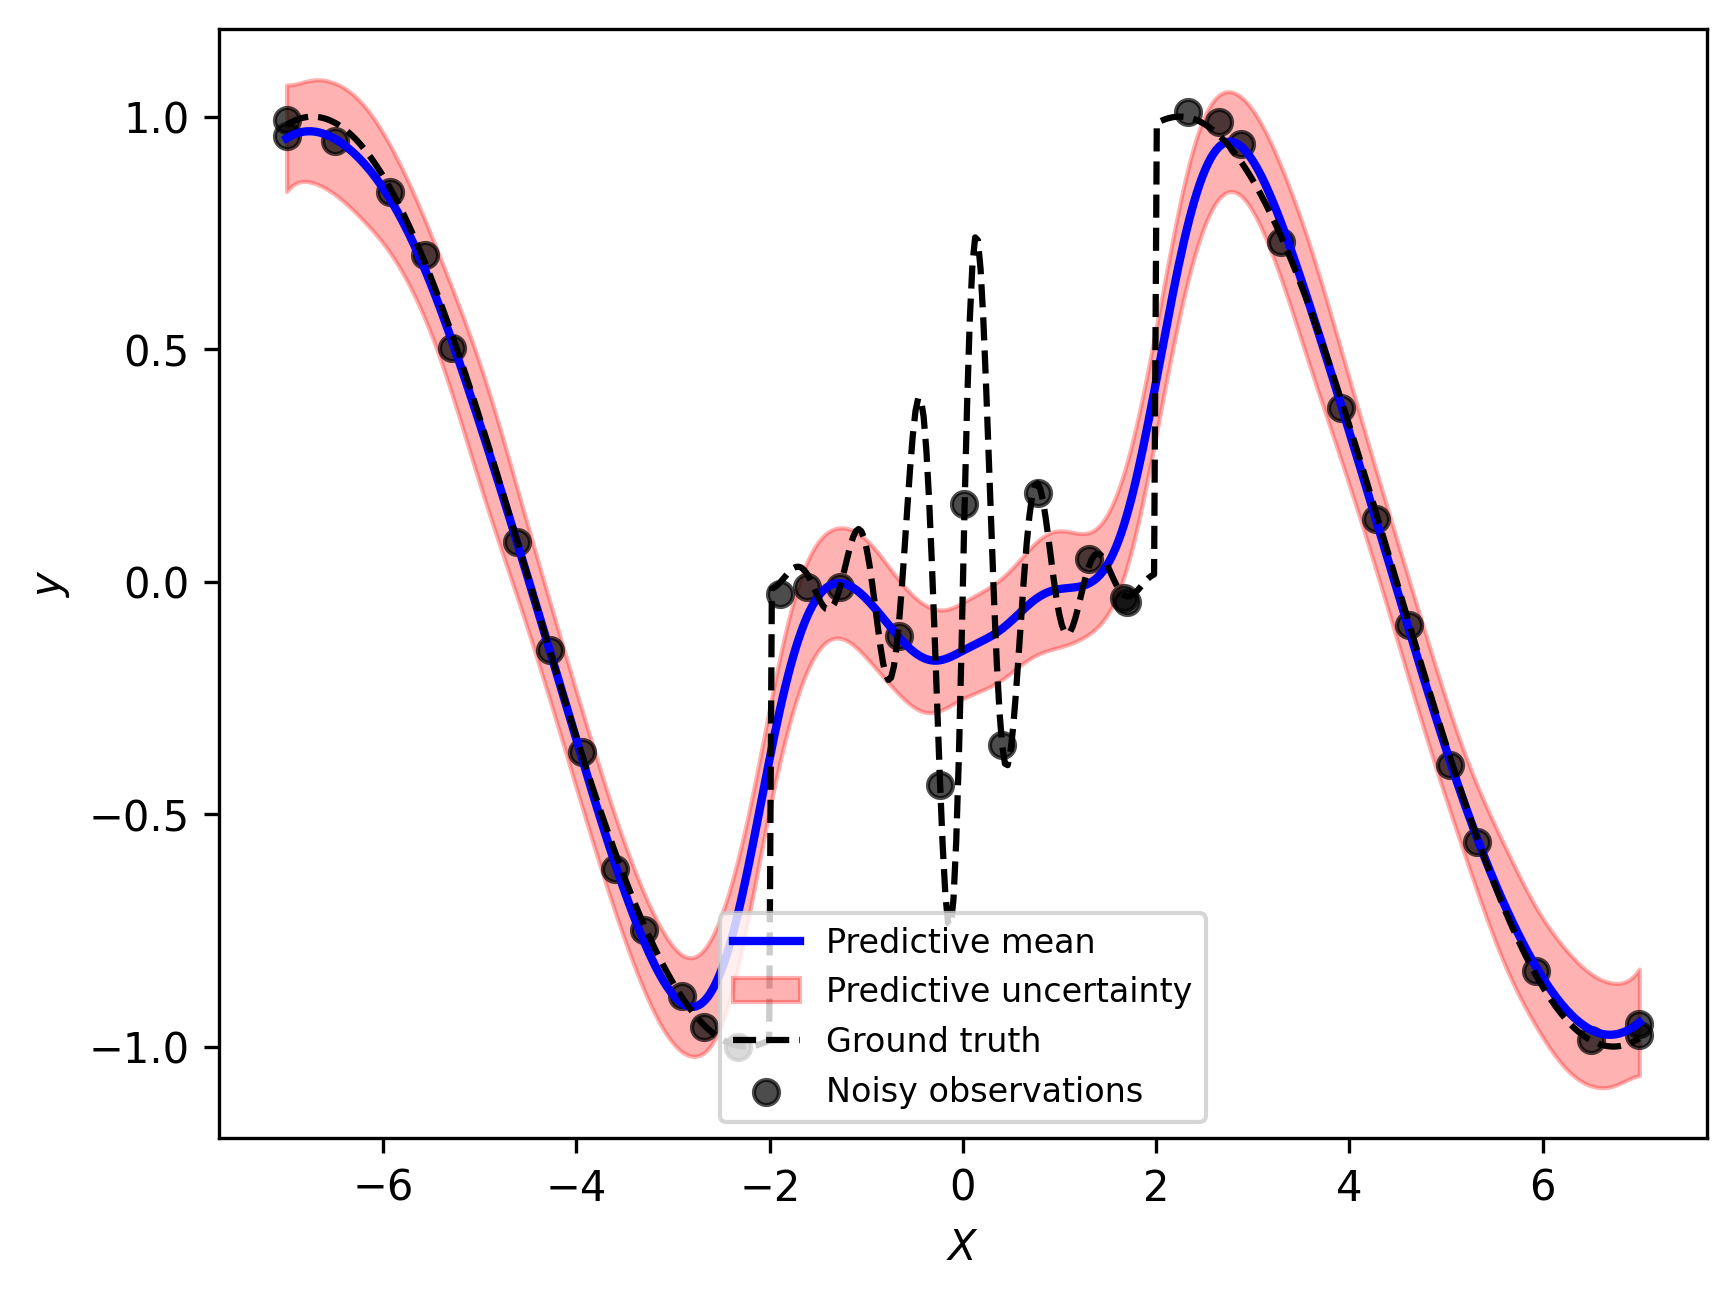

step 36


sample: 100%|██████████| 2000/2000 [00:04<00:00, 426.13it/s, 7 steps of size 5.19e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.64      0.47      1.58      0.93      2.32    283.70      1.02
    k_scale      0.67      0.46      0.55      0.19      1.13    301.95      1.01
      noise      0.03      0.01      0.03      0.01      0.04    546.85      1.00

step 37


sample: 100%|██████████| 2000/2000 [00:04<00:00, 464.74it/s, 11 steps of size 5.40e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.62      0.44      1.55      0.95      2.31    332.99      1.01
    k_scale      0.65      0.43      0.54      0.17      1.10    367.14      1.01
      noise      0.03      0.01      0.03      0.01      0.04    707.50      1.00

step 38


sample: 100%|██████████| 2000/2000 [00:04<00:00, 423.32it/s, 7 steps of size 5.20e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.59      0.43      1.55      0.92      2.22    407.06      1.00
    k_scale      0.64      0.41      0.54      0.18      1.08    301.37      1.00
      noise      0.03      0.01      0.03      0.01      0.04    691.63      1.00

step 39


sample: 100%|██████████| 2000/2000 [00:04<00:00, 410.53it/s, 7 steps of size 4.52e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.58      0.42      1.53      0.91      2.17    477.74      1.01
    k_scale      0.63      0.40      0.53      0.19      1.09    422.35      1.01
      noise      0.03      0.01      0.02      0.01      0.04    627.06      1.00

step 40


sample: 100%|██████████| 2000/2000 [00:04<00:00, 491.72it/s, 7 steps of size 4.37e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.60      0.42      1.54      0.93      2.18    445.22      1.00
    k_scale      0.65      0.41      0.53      0.19      1.15    383.11      1.00
      noise      0.02      0.01      0.02      0.01      0.04    679.26      1.00



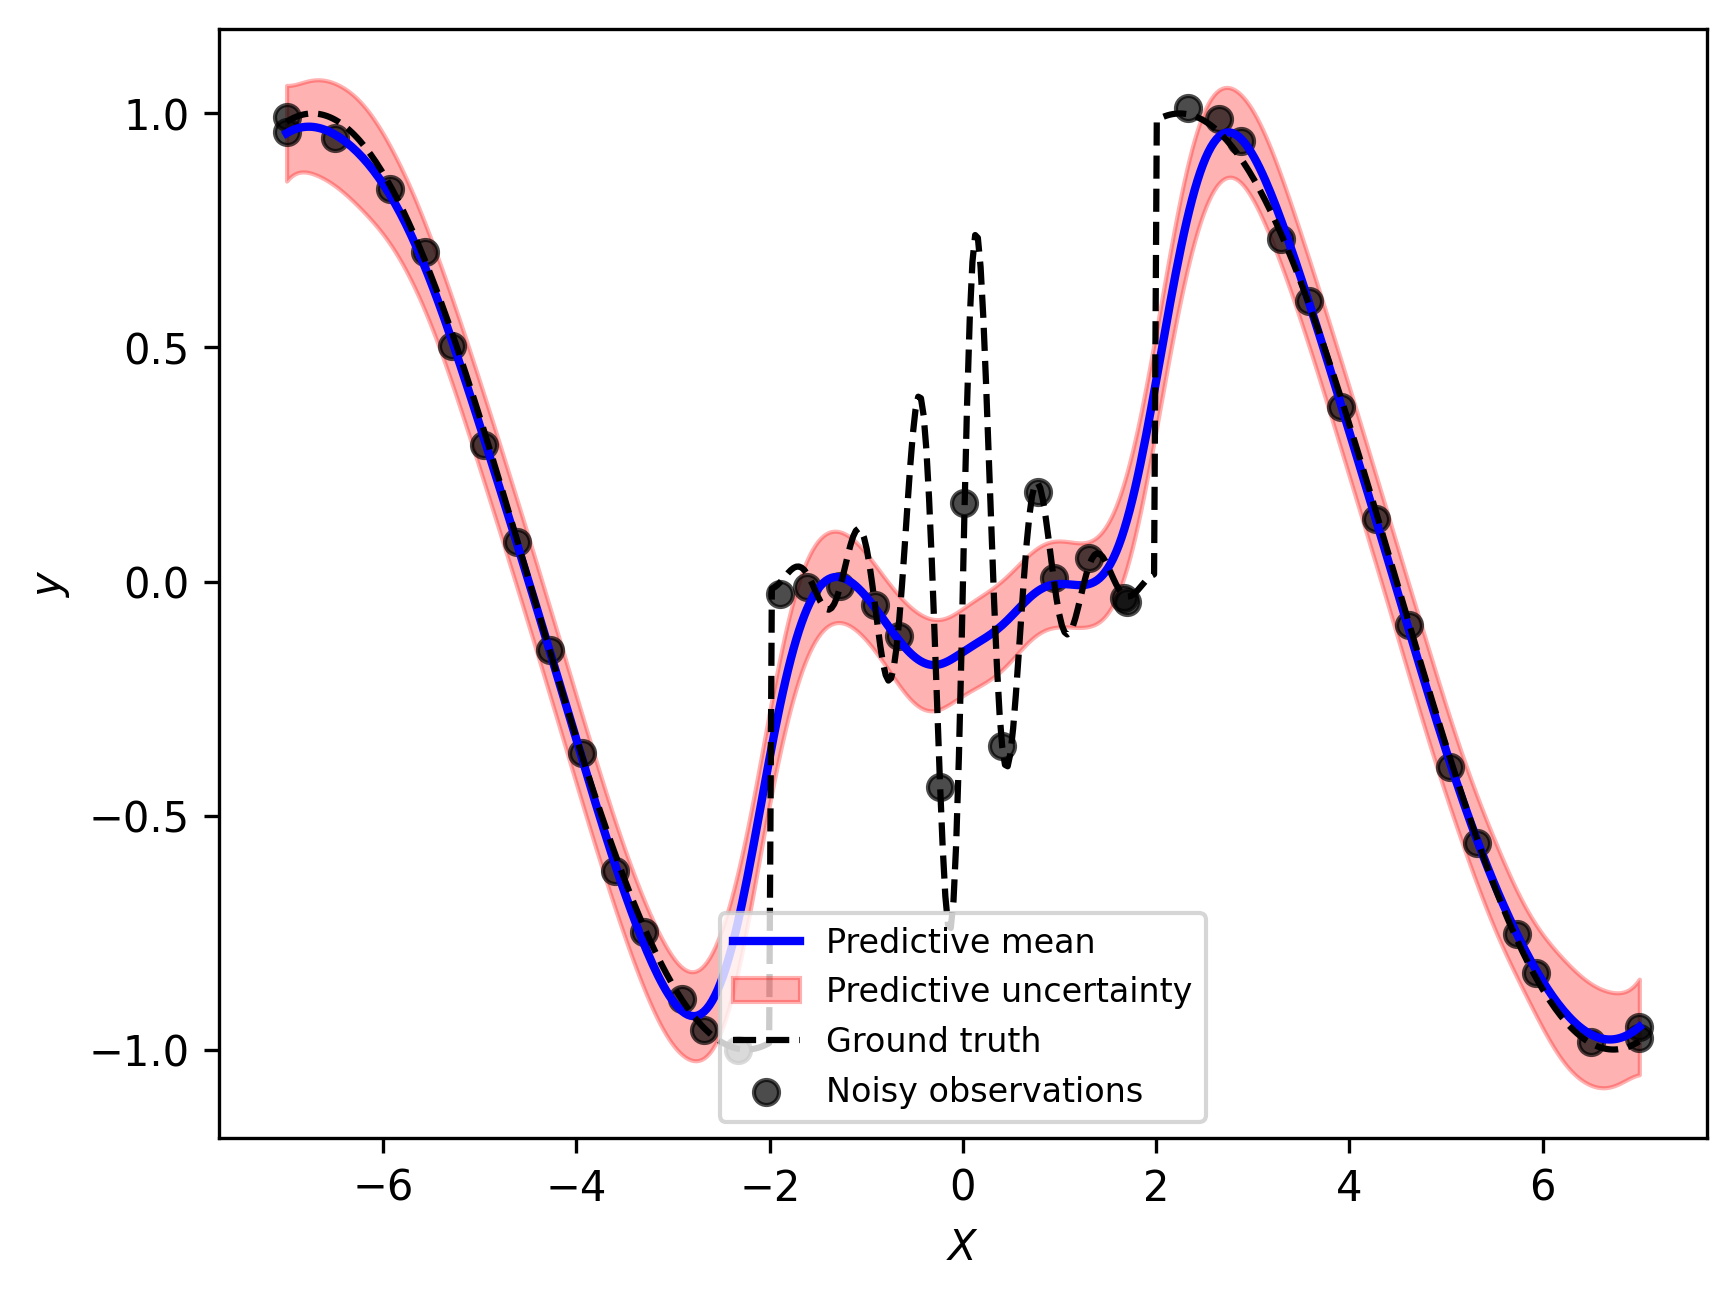

In [3]:
exploration_steps = 40
num_init_points = 4

np.random.seed(42)
X_measured = np.linspace(x_start, x_stop, num_init_points)
y_measured = measure(X_measured)

for step in range(exploration_steps):
    print('step {}'.format(step + 1))
    model = nb.GP(kernel=nb.kernels.MaternKernel)
    model.fit(X_measured, y_measured, num_warmup=1000, num_samples=1000)
    posterior_mean, posterior_var = model.predict(X_domain)
    next_point_idx = posterior_var.argmax()
    X_next = X_domain[next_point_idx][None]
    y_next = measure(X_next)

    if step in (0, exploration_steps - 1) or (step + 1) % 5 == 0:
        _, ax = plt.subplots(dpi=300)
        ax.set_xlabel("$X$")
        ax.set_ylabel("$y$")
        ax.plot(X_domain, posterior_mean, lw=2.0,  c='blue', label='Predictive mean')
        ax.fill_between(X_domain,
                        posterior_mean - np.sqrt(posterior_var),
                        posterior_mean + np.sqrt(posterior_var),
                        color='r', alpha=0.3, label="Predictive uncertainty")
        ax.plot(X_domain, y_true, '--', c='k', label='Ground truth')
        ax.scatter(X_measured, y_measured, c='k', label="Noisy observations", alpha=0.7)
        ax.legend(loc='best', fontsize=8)
        plt.show()

    X_measured = np.append(X_measured, X_next)
    y_measured = np.append(y_measured, y_next)

Compute MSE and NLPD scores:

In [4]:
mse_gp = nb.utils.mse(posterior_mean, y_true)
nlpd_gp = nb.utils.nlpd(y_true, posterior_mean, posterior_var)

## Partial BNN-based active learning

The ```PartialBNN``` combines deterministic and Bayesian layers. For untrained networks, it first performs MAP estimation using regularized SGD with stochastic weight averaging to find good deterministic weights. These MAP-optimized weights then serve as the means for the Gaussian priors in the Bayesian layers, around which MCMC sampling using No U-Turn Sampler explores the posterior distribution. Alternatively, pre-trained weights can be provided directly at the model initialization stage.

step 1
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:01<00:00, 479.93it/s, Epoch 500/500, Avg Loss: 0.0483]


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1058.52it/s, 63 steps of size 5.89e-02. acc. prob=0.72]


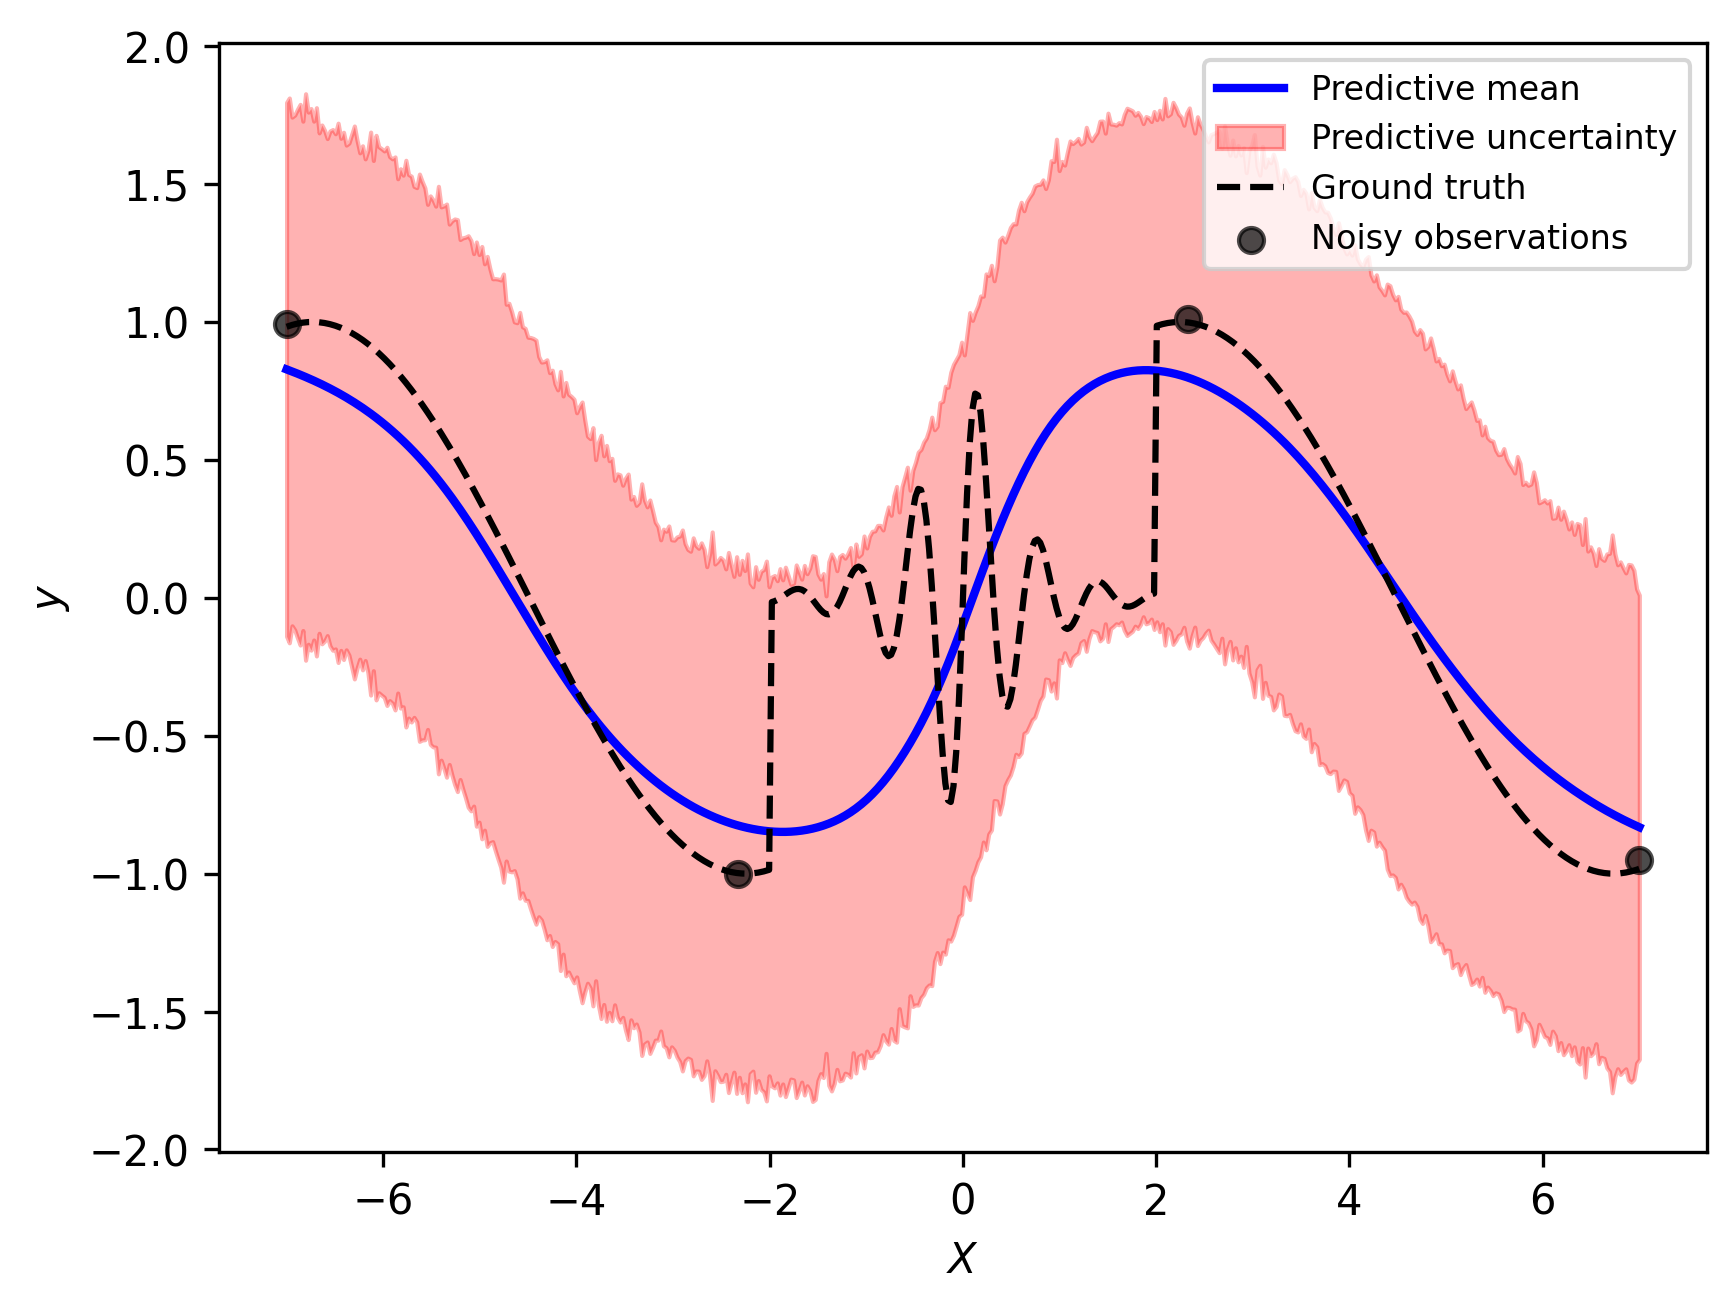

step 2
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 925.73it/s, Epoch 500/500, Avg Loss: 0.0449] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 976.07it/s, 63 steps of size 5.62e-02. acc. prob=0.77] 


step 3
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 974.83it/s, Epoch 500/500, Avg Loss: 0.0425] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 846.85it/s, 127 steps of size 3.09e-02. acc. prob=0.82] 


step 4
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 914.30it/s, Epoch 500/500, Avg Loss: 0.0398] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 730.90it/s, 66 steps of size 2.24e-02. acc. prob=0.53]  


step 5
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 909.43it/s, Epoch 500/500, Avg Loss: 0.0426] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 683.71it/s, 255 steps of size 1.36e-02. acc. prob=0.90] 


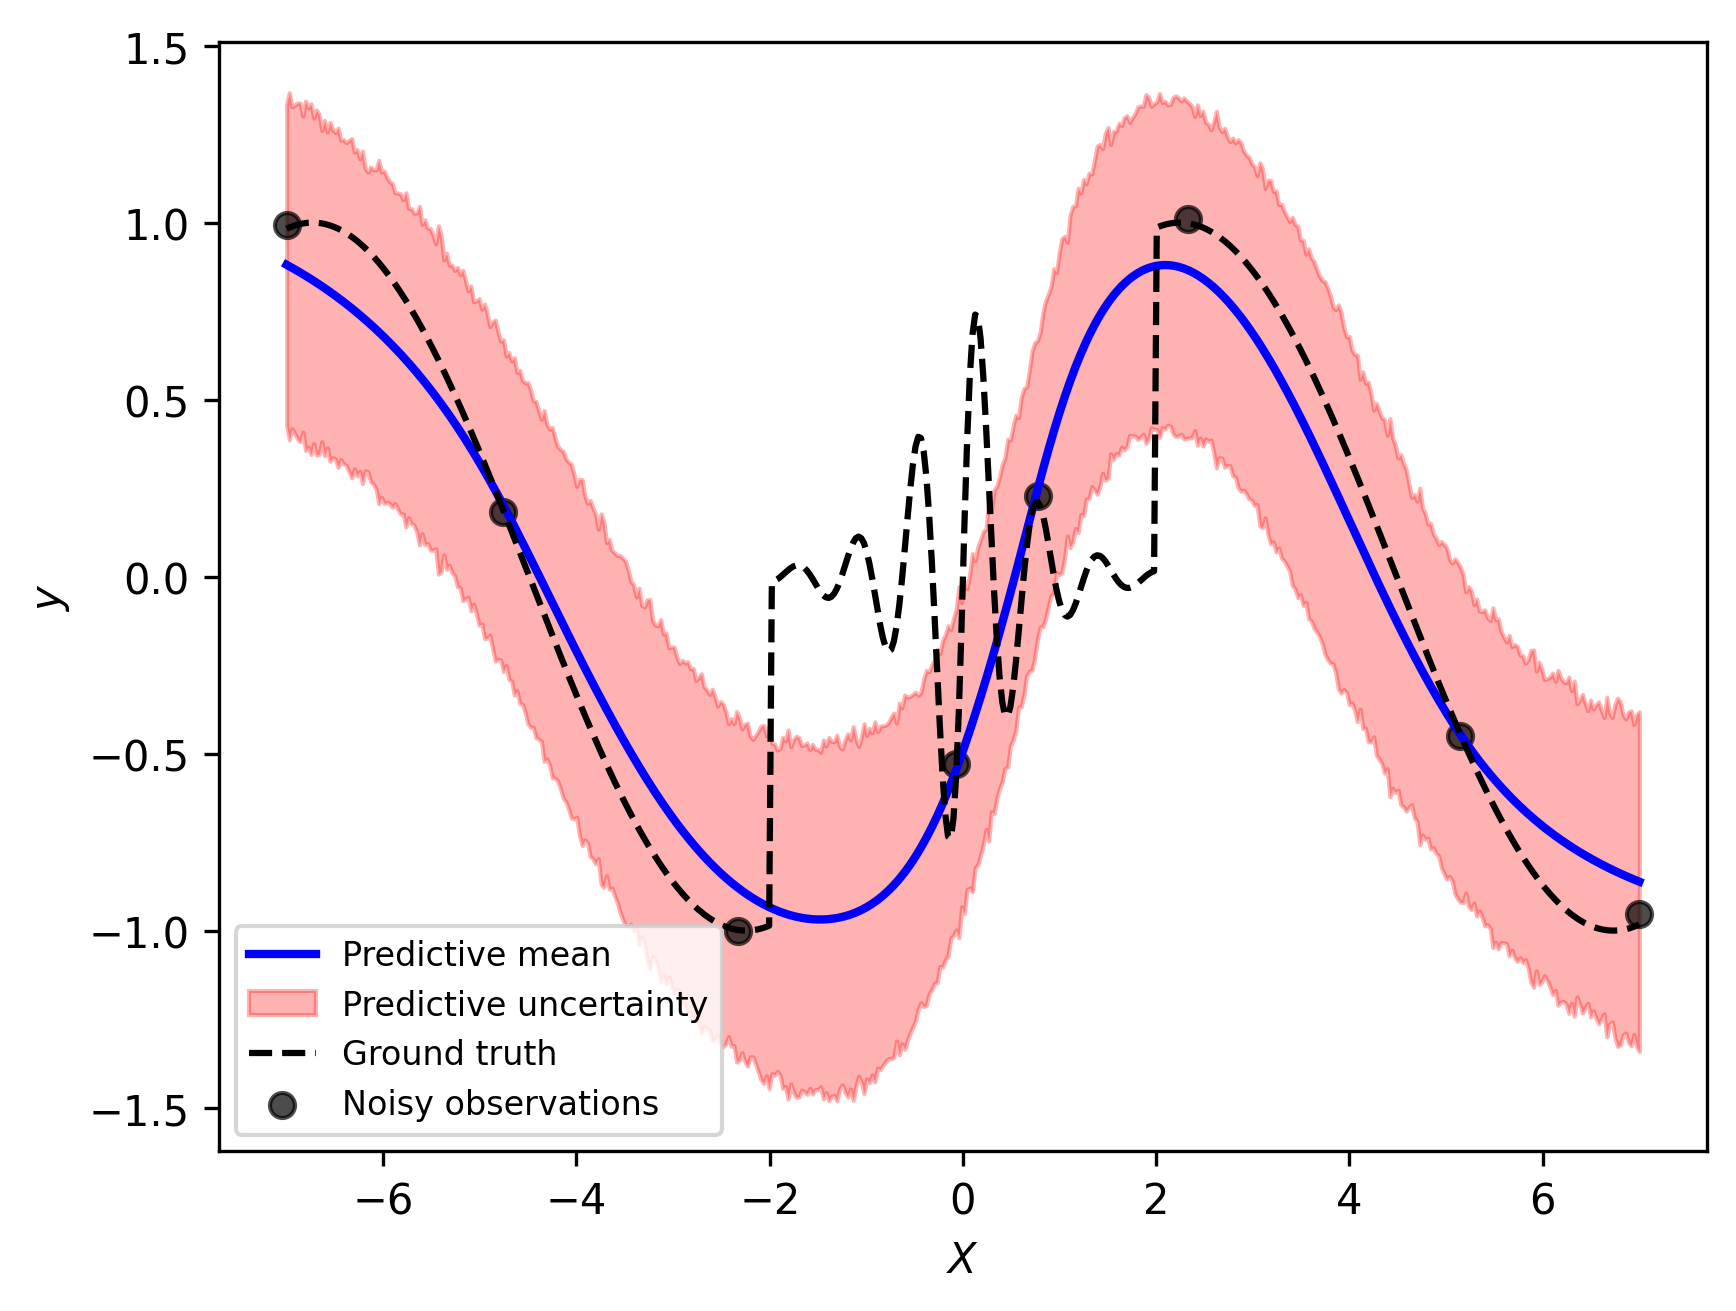

step 6
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 988.89it/s, Epoch 500/500, Avg Loss: 0.0404] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 505.54it/s, 191 steps of size 1.07e-02. acc. prob=0.86]


step 7
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 966.49it/s, Epoch 500/500, Avg Loss: 0.0383] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:04<00:00, 469.72it/s, 68 steps of size 9.18e-03. acc. prob=0.79] 


step 8
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 988.16it/s, Epoch 500/500, Avg Loss: 0.0709] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:04<00:00, 495.95it/s, 511 steps of size 9.43e-03. acc. prob=0.84]


step 9
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 906.77it/s, Epoch 500/500, Avg Loss: 0.0718] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 605.38it/s, 255 steps of size 1.27e-02. acc. prob=0.81] 


step 10
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 970.57it/s, Epoch 500/500, Avg Loss: 0.0683] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 555.44it/s, 124 steps of size 6.57e-03. acc. prob=0.39] 


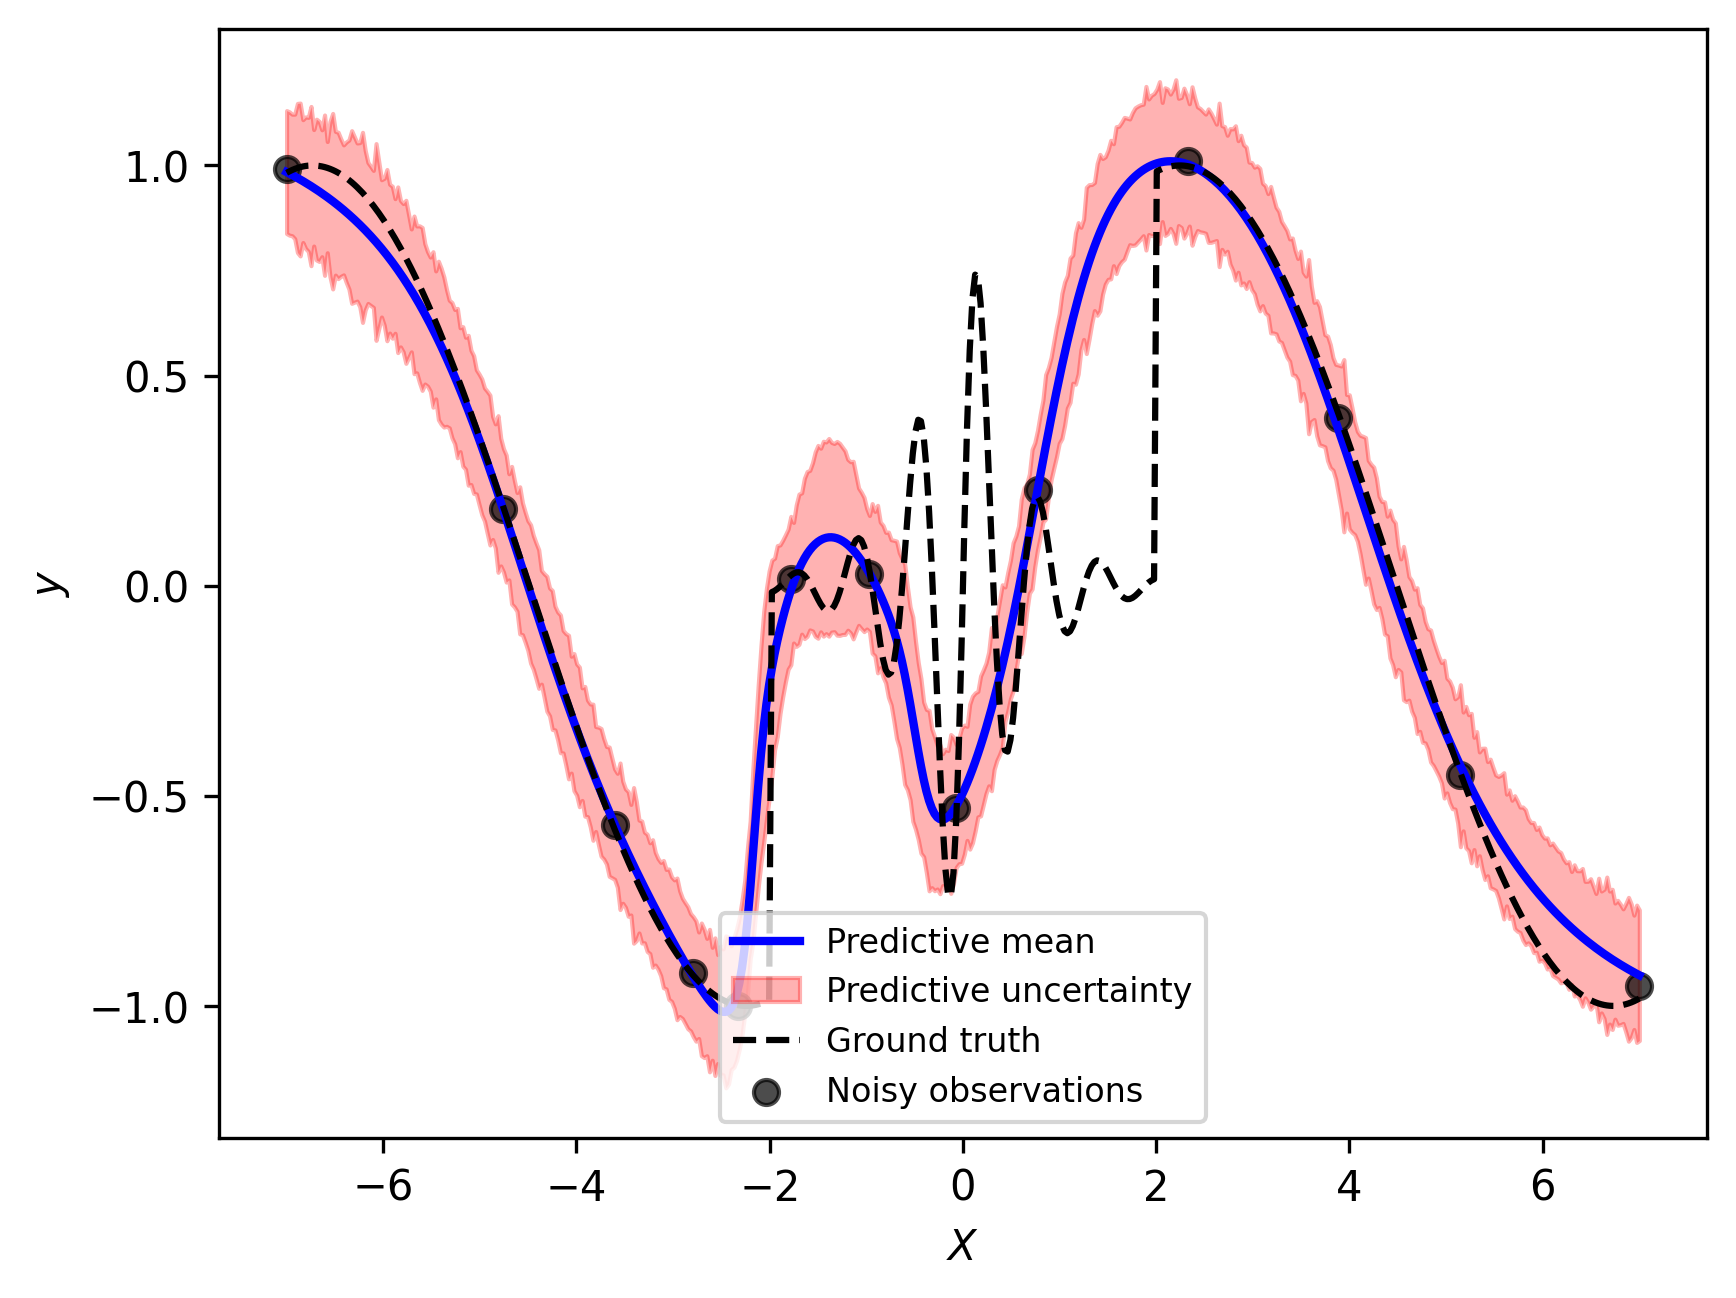

step 11
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 944.67it/s, Epoch 500/500, Avg Loss: 0.0794] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:04<00:00, 495.96it/s, 511 steps of size 6.36e-03. acc. prob=0.94]


step 12
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 963.77it/s, Epoch 500/500, Avg Loss: 0.0788] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 651.25it/s, 255 steps of size 1.64e-02. acc. prob=0.89] 


step 13
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 980.76it/s, Epoch 500/500, Avg Loss: 0.0771] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 670.99it/s, 255 steps of size 2.23e-02. acc. prob=0.82] 


step 14
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 933.68it/s, Epoch 500/500, Avg Loss: 0.0768] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 751.93it/s, 127 steps of size 2.51e-02. acc. prob=0.77] 


step 15
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 973.58it/s, Epoch 500/500, Avg Loss: 0.0754] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 638.55it/s, 255 steps of size 1.66e-02. acc. prob=0.89] 


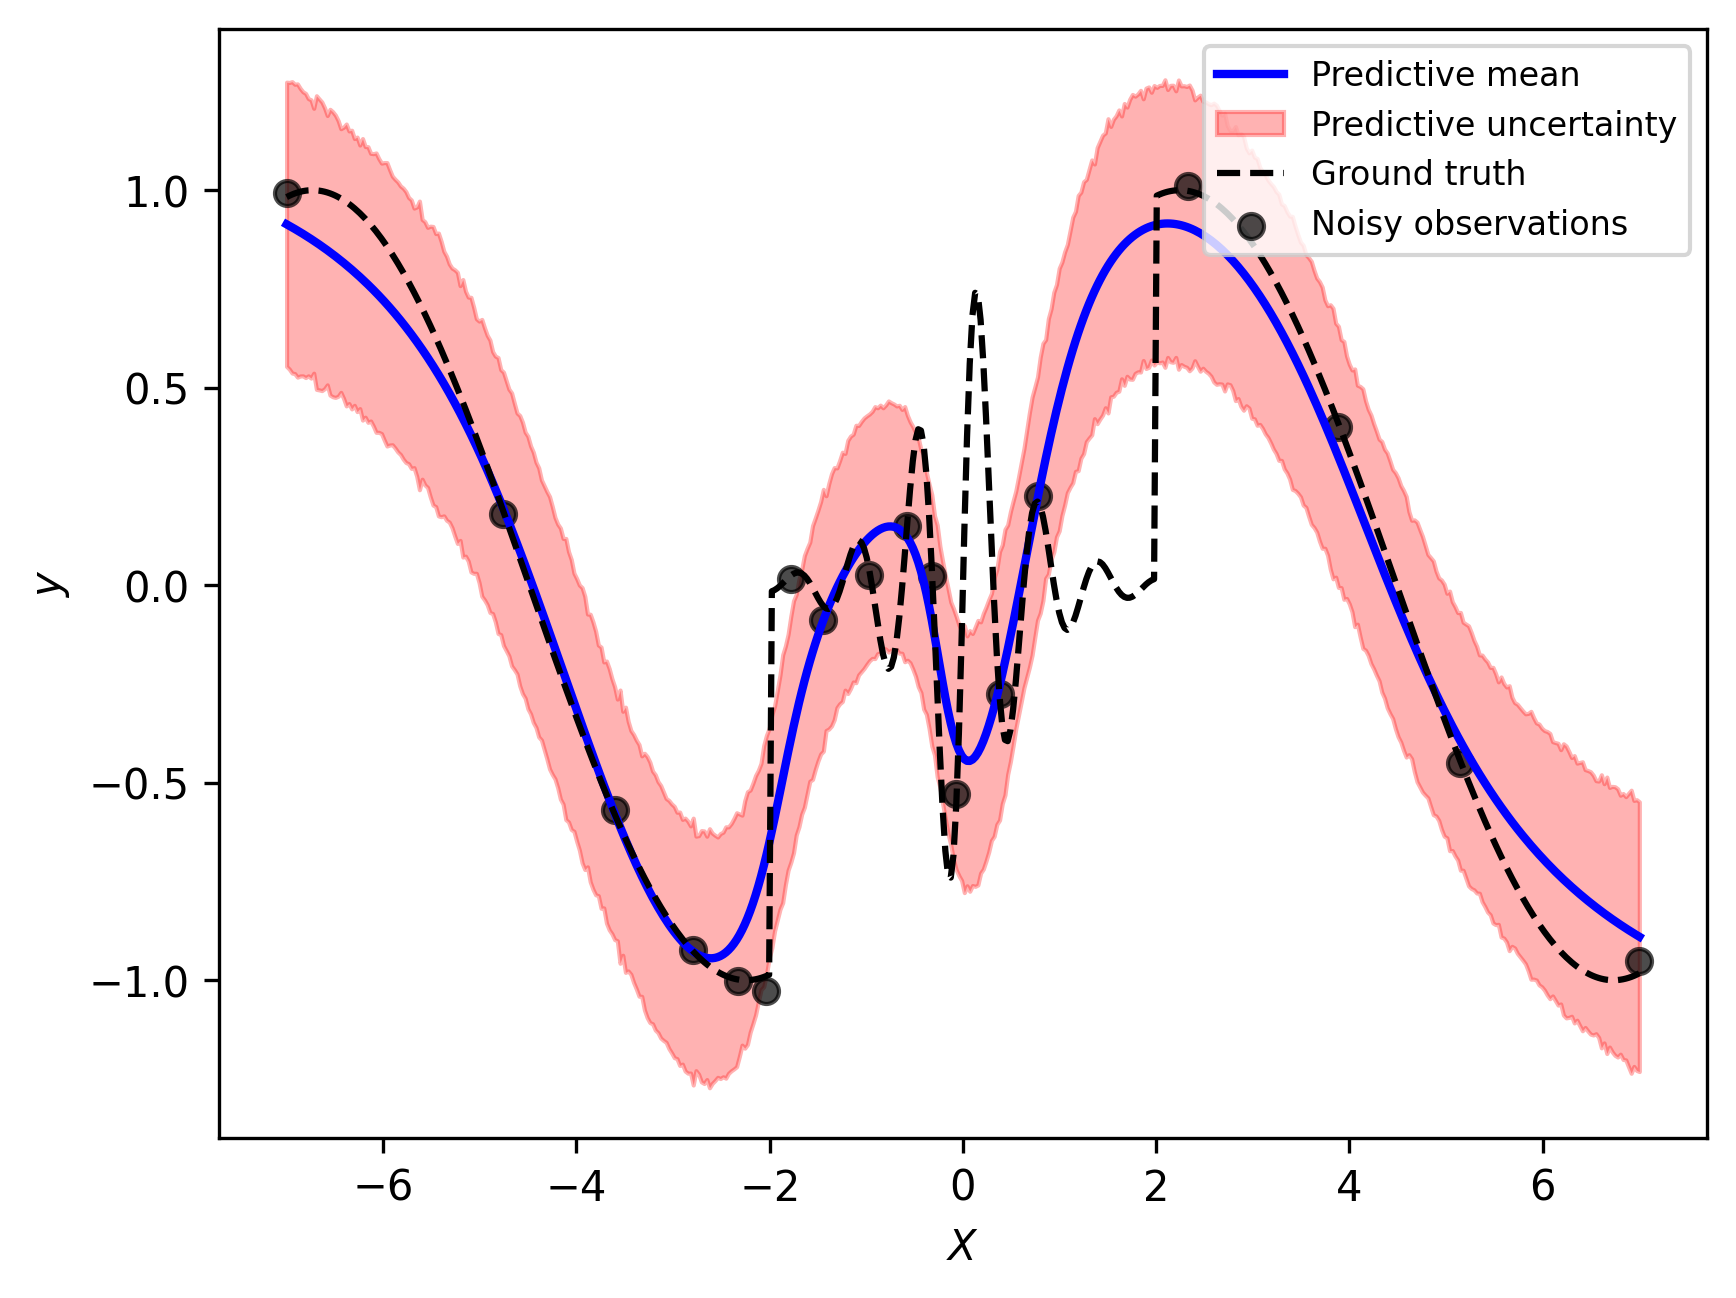

step 16
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 970.07it/s, Epoch 500/500, Avg Loss: 0.0857] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 653.00it/s, 255 steps of size 1.76e-02. acc. prob=0.80] 


step 17
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 957.63it/s, Epoch 500/500, Avg Loss: 0.1117] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 697.65it/s, 255 steps of size 2.19e-02. acc. prob=0.89] 


step 18
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 942.18it/s, Epoch 500/500, Avg Loss: 0.1041] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 648.75it/s, 255 steps of size 1.84e-02. acc. prob=0.89] 


step 19
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 919.84it/s, Epoch 500/500, Avg Loss: 0.1015] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 636.81it/s, 255 steps of size 1.94e-02. acc. prob=0.84] 


step 20
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 944.45it/s, Epoch 500/500, Avg Loss: 0.1100] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:02<00:00, 668.66it/s, 255 steps of size 2.13e-02. acc. prob=0.85] 


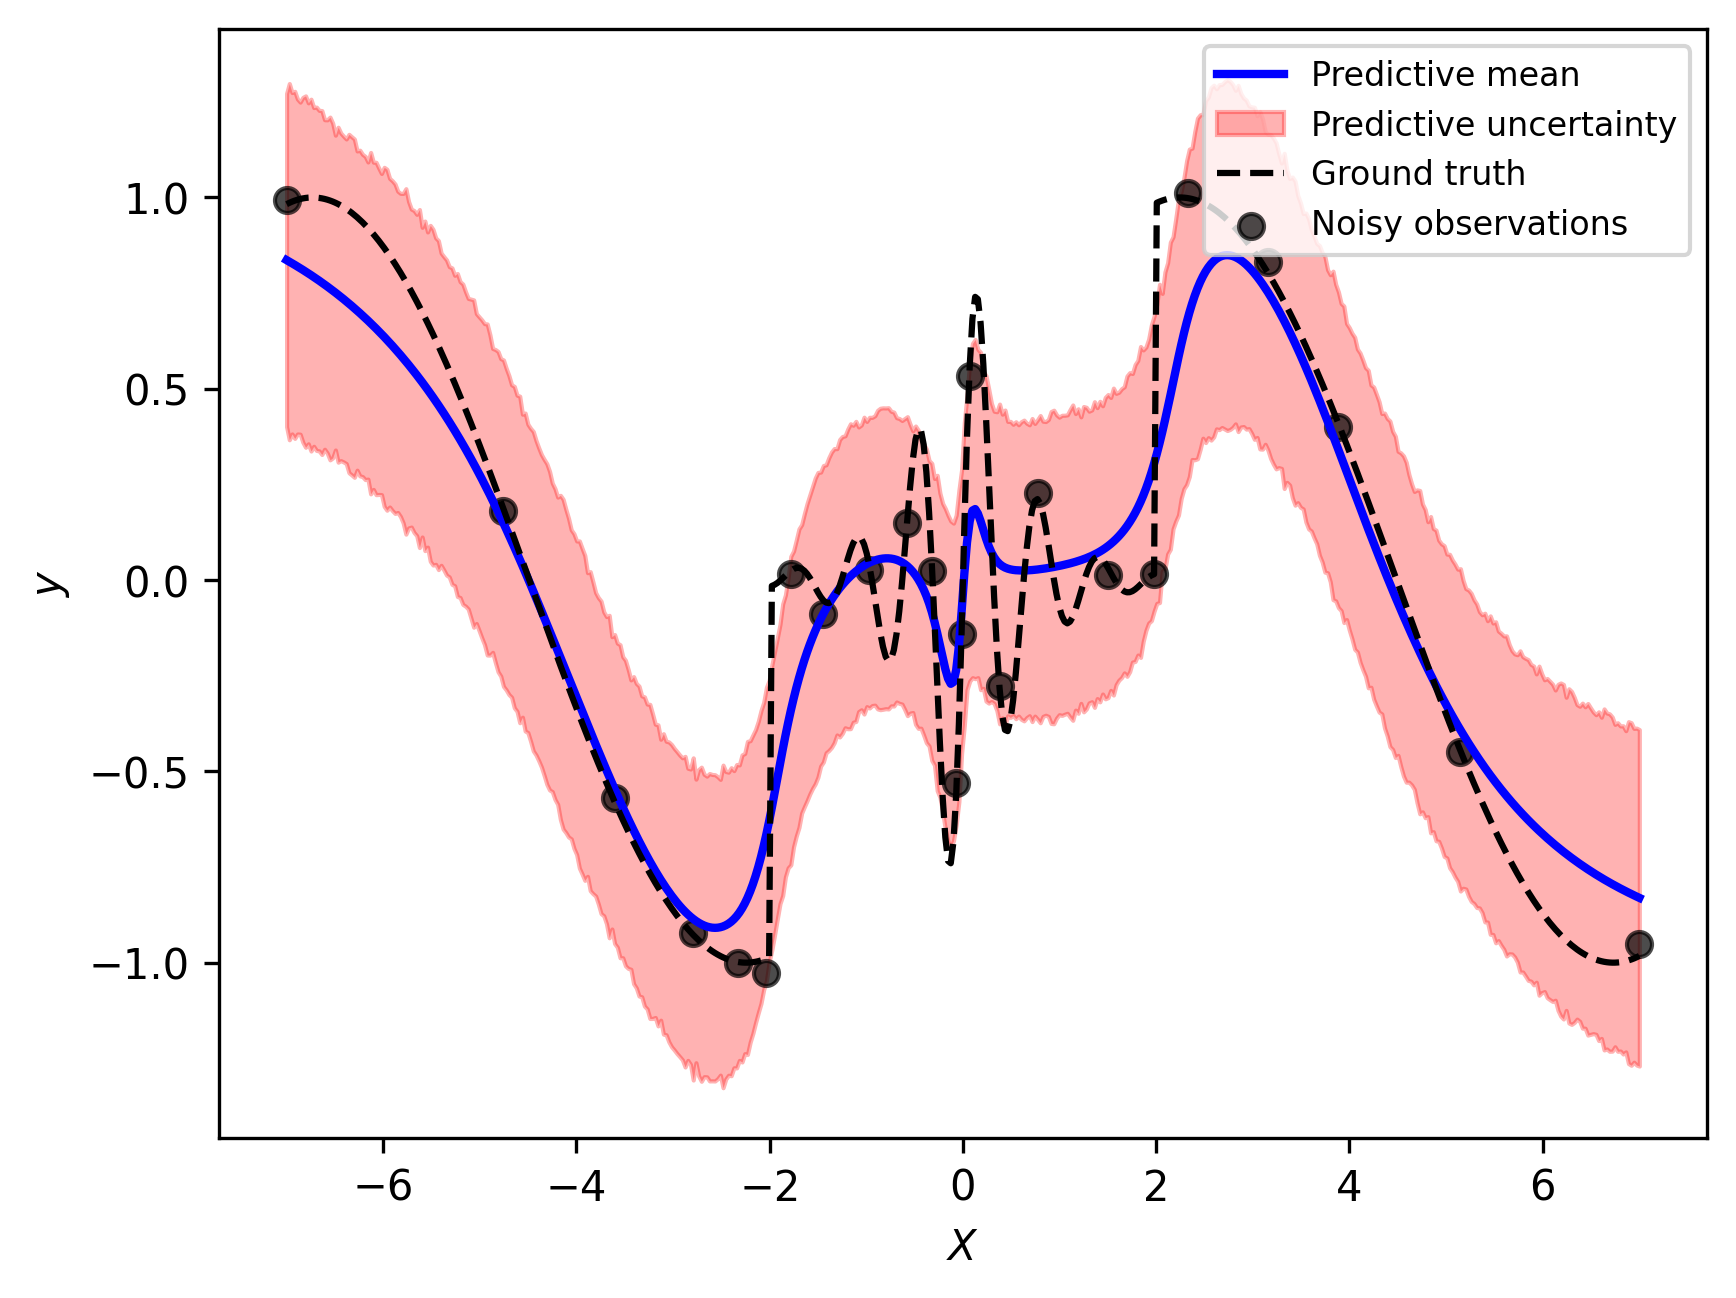

step 21
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 954.92it/s, Epoch 500/500, Avg Loss: 0.0992] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 638.91it/s, 255 steps of size 1.97e-02. acc. prob=0.84] 


step 22
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 943.30it/s, Epoch 500/500, Avg Loss: 0.0893] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:03<00:00, 541.91it/s, 255 steps of size 1.25e-02. acc. prob=0.77]


step 23
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 961.36it/s, Epoch 500/500, Avg Loss: 0.0823] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:05<00:00, 344.71it/s, 1023 steps of size 4.93e-03. acc. prob=0.75]


step 24
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 954.30it/s, Epoch 500/500, Avg Loss: 0.0815] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:04<00:00, 427.87it/s, 511 steps of size 6.92e-03. acc. prob=0.92]


step 25
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 880.43it/s, Epoch 500/500, Avg Loss: 0.0845] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:05<00:00, 335.61it/s, 511 steps of size 5.95e-03. acc. prob=0.81] 


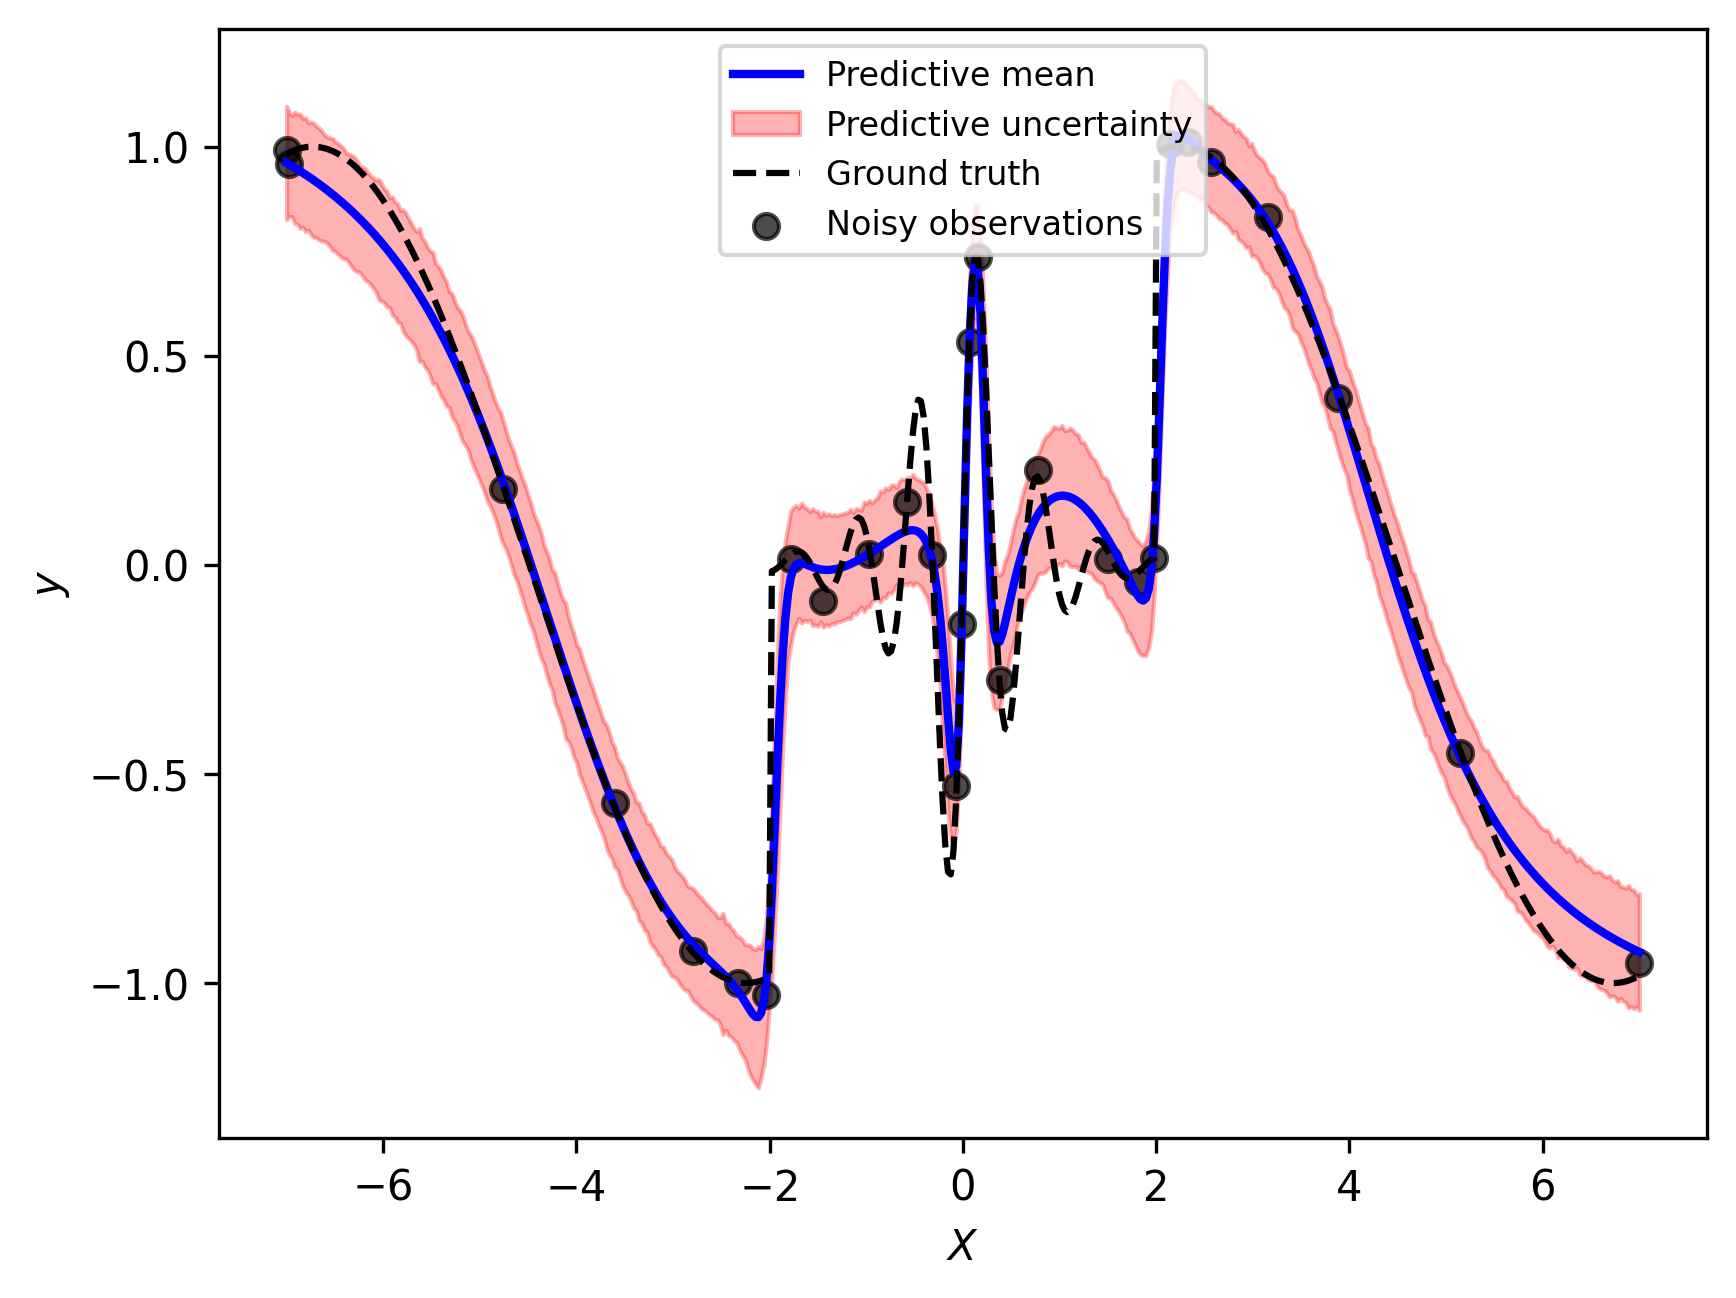

step 26
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 896.78it/s, Epoch 500/500, Avg Loss: 0.0820] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:04<00:00, 493.93it/s, 5 steps of size 9.11e-03. acc. prob=0.30]  


step 27
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 929.14it/s, Epoch 500/500, Avg Loss: 0.0839] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:06<00:00, 285.89it/s, 1023 steps of size 5.07e-03. acc. prob=0.77]


step 28
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 895.65it/s, Epoch 500/500, Avg Loss: 0.0870] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:04<00:00, 483.55it/s, 255 steps of size 1.34e-02. acc. prob=0.72] 


step 29
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 925.44it/s, Epoch 500/500, Avg Loss: 0.0839] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:07<00:00, 269.69it/s, 1023 steps of size 2.67e-03. acc. prob=0.95]


step 30
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 885.54it/s, Epoch 500/500, Avg Loss: 0.0864] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:07<00:00, 250.24it/s, 1023 steps of size 3.75e-03. acc. prob=0.92]


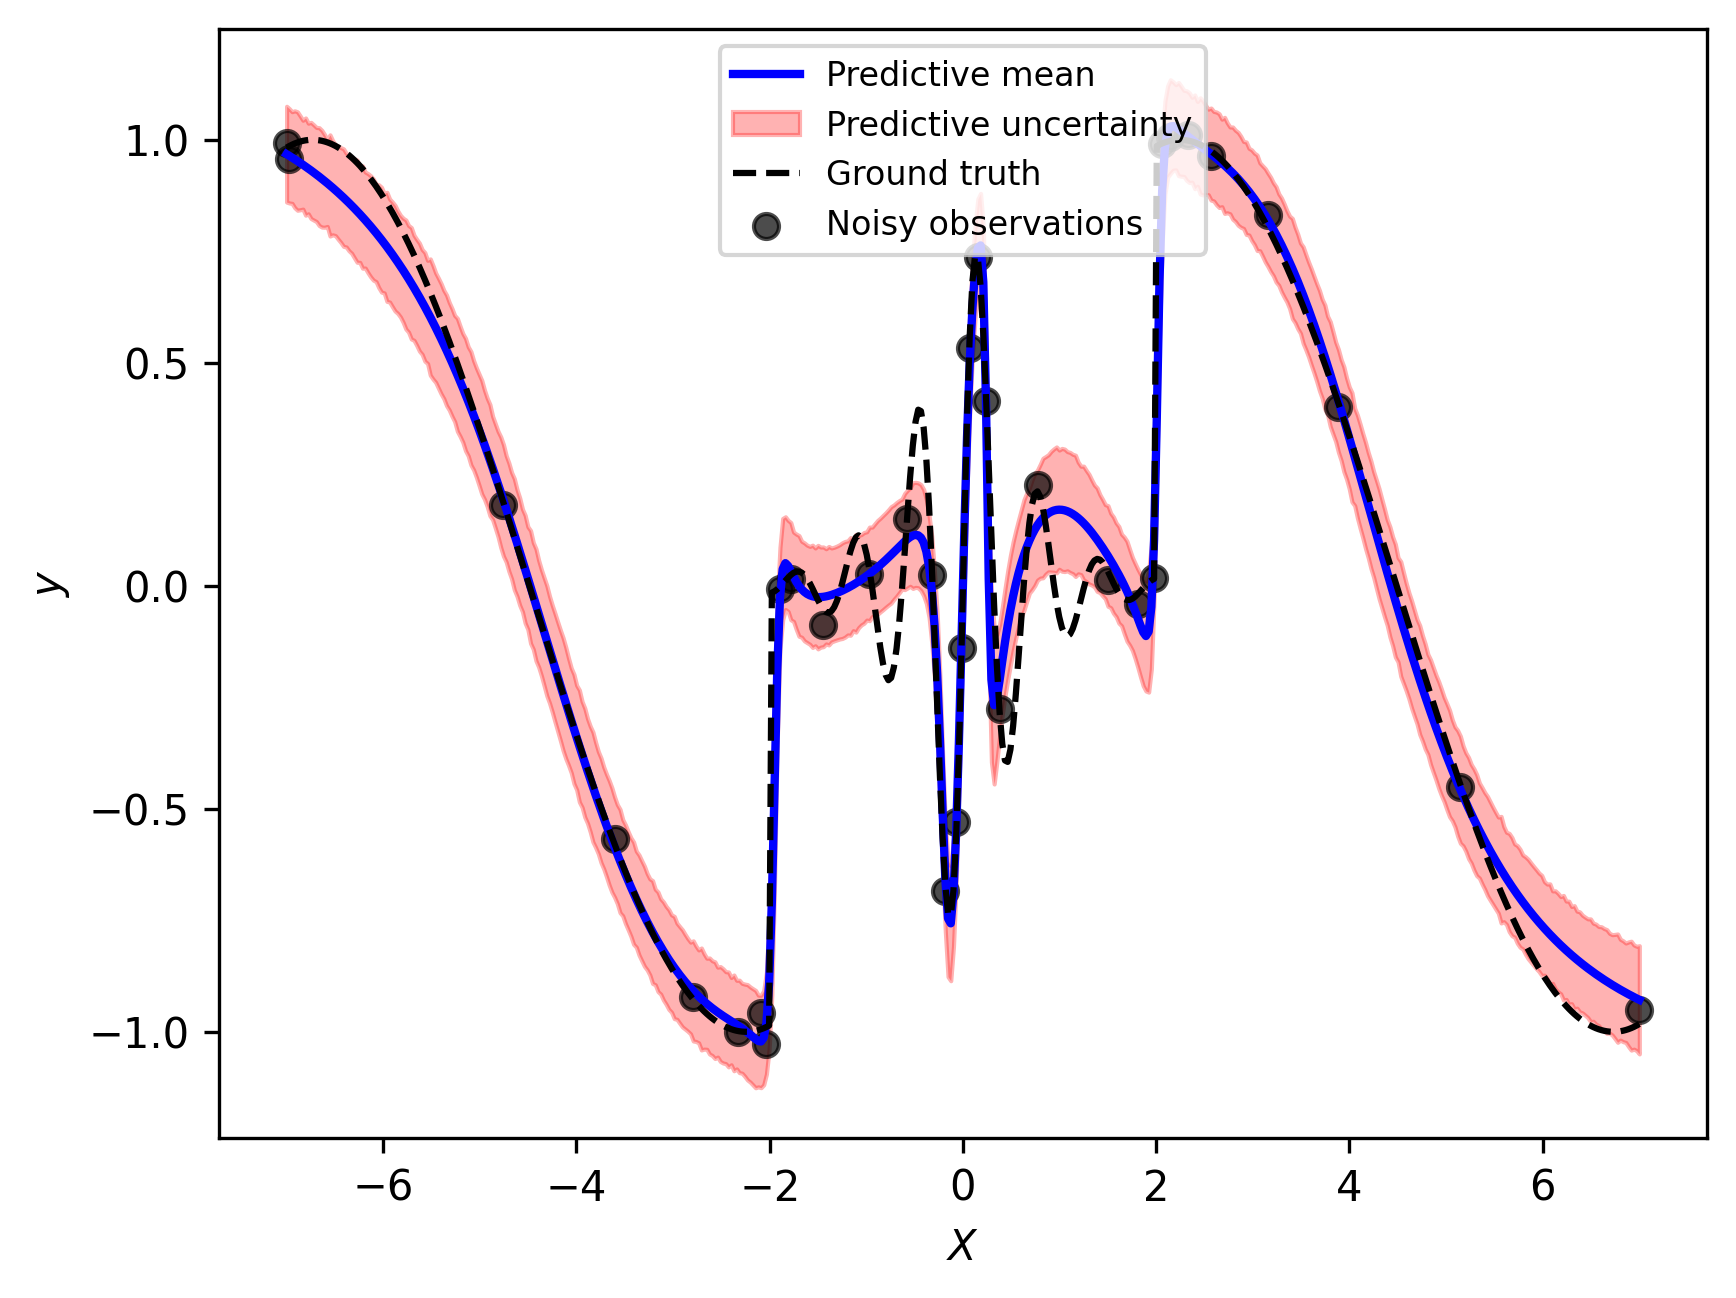

step 31
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 858.05it/s, Epoch 500/500, Avg Loss: 0.0881] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:06<00:00, 326.53it/s, 511 steps of size 6.56e-03. acc. prob=0.85]


step 32
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:01<00:00, 441.33it/s, Epoch 500/500, Avg Loss: 0.0875]


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:05<00:00, 368.48it/s, 118 steps of size 1.12e-02. acc. prob=0.81]


step 33
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 818.02it/s, Epoch 500/500, Avg Loss: 0.0905] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:05<00:00, 371.55it/s, 511 steps of size 1.06e-02. acc. prob=0.80]


step 34
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 824.14it/s, Epoch 500/500, Avg Loss: 0.0867] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:05<00:00, 352.23it/s, 511 steps of size 8.63e-03. acc. prob=0.87]


step 35
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 859.17it/s, Epoch 500/500, Avg Loss: 0.0828] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:08<00:00, 233.03it/s, 1023 steps of size 3.71e-03. acc. prob=0.93]


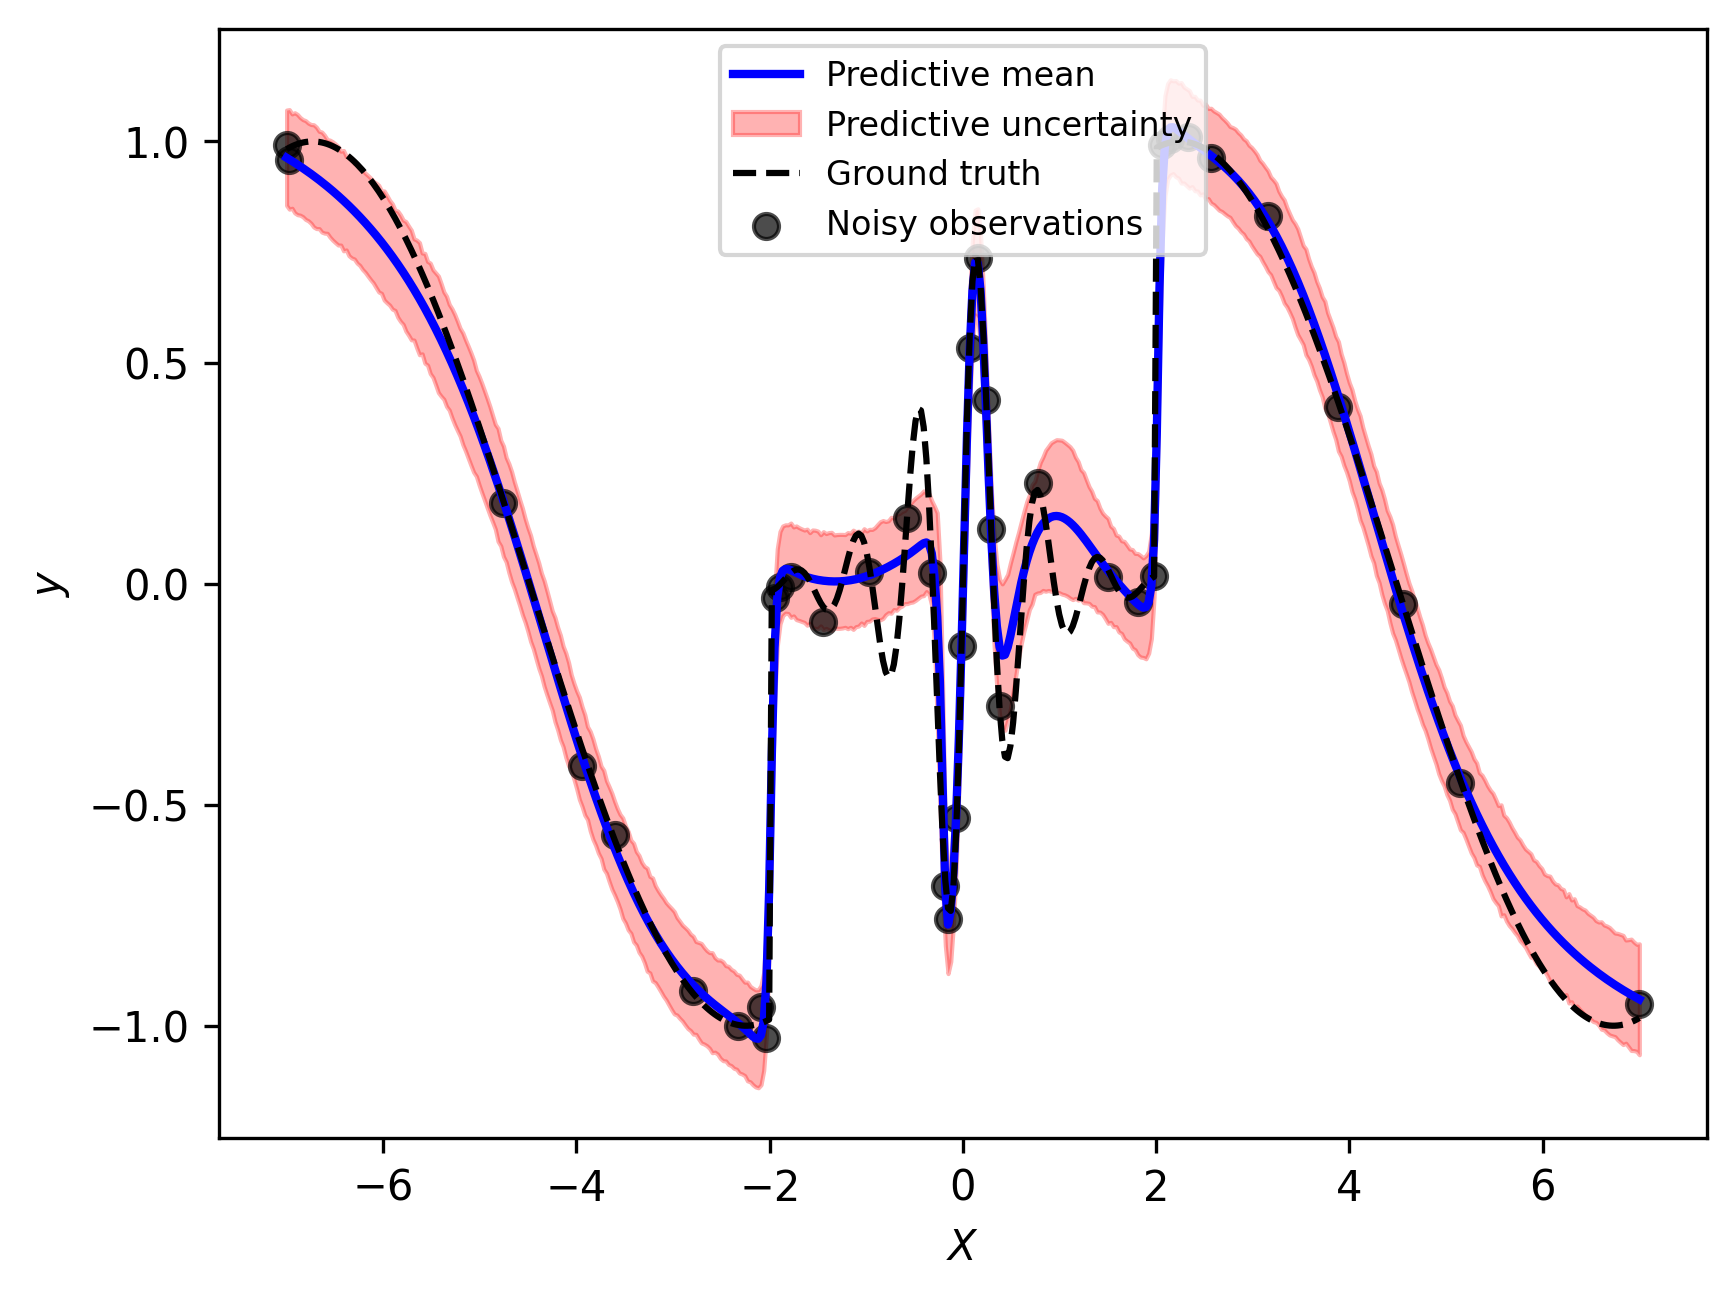

step 36
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 837.94it/s, Epoch 500/500, Avg Loss: 0.0826] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:06<00:00, 310.11it/s, 511 steps of size 6.29e-03. acc. prob=0.82] 


step 37
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 865.55it/s, Epoch 500/500, Avg Loss: 0.0814] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:05<00:00, 334.90it/s, 511 steps of size 8.04e-03. acc. prob=0.88]


step 38
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 879.71it/s, Epoch 500/500, Avg Loss: 0.0782] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:06<00:00, 314.91it/s, 511 steps of size 6.31e-03. acc. prob=0.93] 


step 39
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 857.53it/s, Epoch 500/500, Avg Loss: 0.0754] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:07<00:00, 282.02it/s, 6 steps of size 5.89e-03. acc. prob=0.77]   


step 40
Training deterministic NN...


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 873.02it/s, Epoch 500/500, Avg Loss: 0.0713] 


Training partially Bayesian NN


sample: 100%|██████████| 2000/2000 [00:06<00:00, 306.72it/s, 511 steps of size 6.36e-03. acc. prob=0.92]


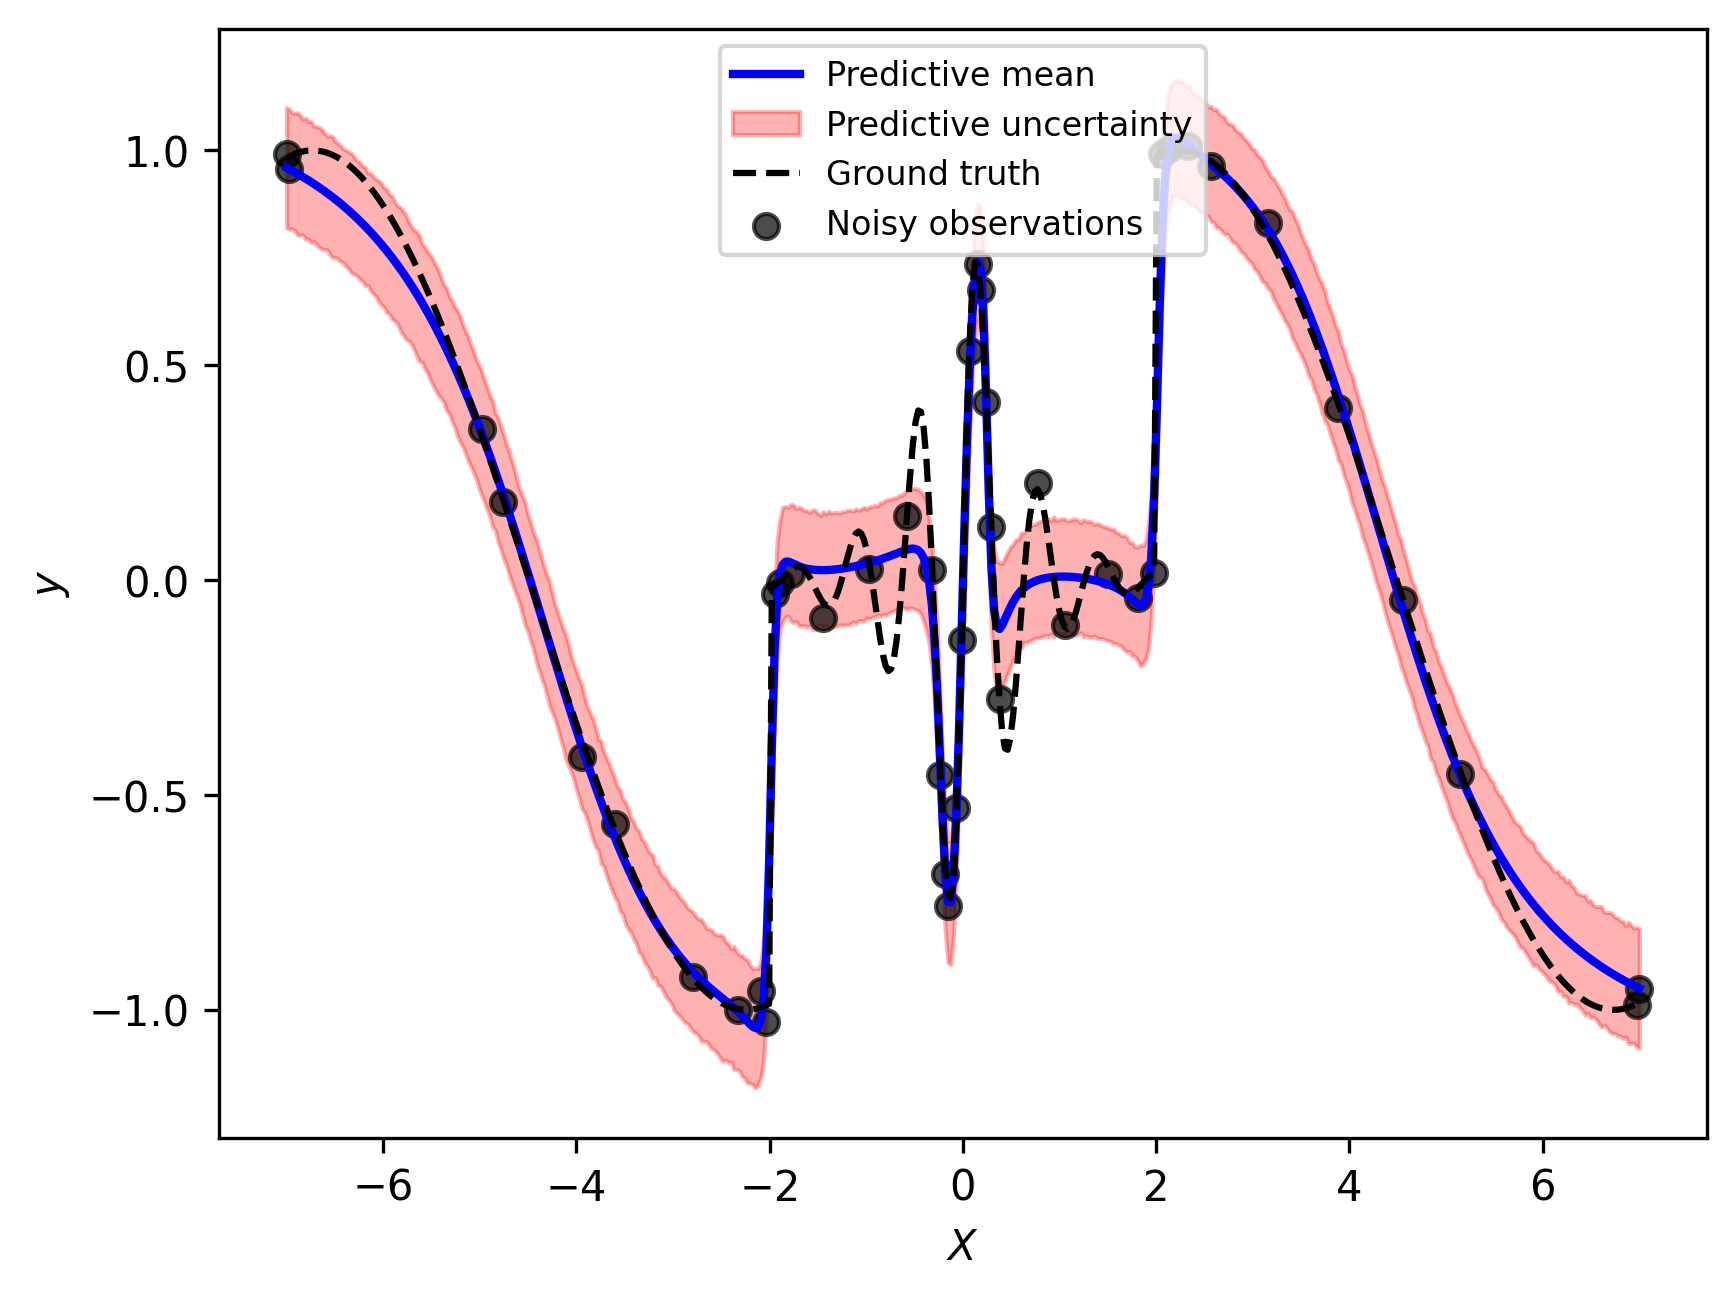

In [6]:
exploration_steps = 40
num_init_points = 4

np.random.seed(42)
X_measured = np.linspace(x_start, x_stop, num_init_points)
y_measured = measure(X_measured)

for step in range(exploration_steps):
    print('step {}'.format(step + 1))
    architecture = nb.FlaxMLP(hidden_dims=[32, 16, 8, 4], target_dim=1)
    model = nb.PartialBNN(architecture, num_probabilistic_layers=2)
    model.fit(
        X_measured, y_measured, sgd_epochs=500, sgd_lr=5e-3,
        map_sigma=nb.utils.calculate_sigma(X_measured),
        num_warmup=1000, num_samples=1000)
    posterior_mean, posterior_var = model.predict(X_domain)
    posterior_mean = posterior_mean.squeeze()
    posterior_var = posterior_var.squeeze()
    next_point_idx = posterior_var.argmax()
    X_next = X_domain[next_point_idx][None]
    y_next = measure(X_next)

    if step in (0, exploration_steps - 1) or (step + 1) % 5 == 0:
        _, ax = plt.subplots(dpi=300)
        ax.set_xlabel("$X$")
        ax.set_ylabel("$y$")
        ax.plot(X_domain, posterior_mean, lw=2.0,  c='blue', label='Predictive mean')
        ax.fill_between(X_domain,
                        posterior_mean - np.sqrt(posterior_var),
                        posterior_mean + np.sqrt(posterior_var),
                        color='r', alpha=0.3, label="Predictive uncertainty")
        ax.plot(X_domain, y_true, '--', c='k', label='Ground truth')
        ax.scatter(X_measured, y_measured, label="Noisy observations", c='k', alpha=0.7)
        ax.legend(loc='best', fontsize=8)
        plt.show()

    X_measured = np.append(X_measured, X_next)
    y_measured = np.append(y_measured, y_next)

Compute MSE and NLPD scores for PBNN:

In [7]:
mse_bnn = nb.utils.mse(posterior_mean, y_true)
nlpd_bnn = nb.utils.nlpd(y_true, posterior_mean, posterior_var)

## Compare results

(the lower the better)

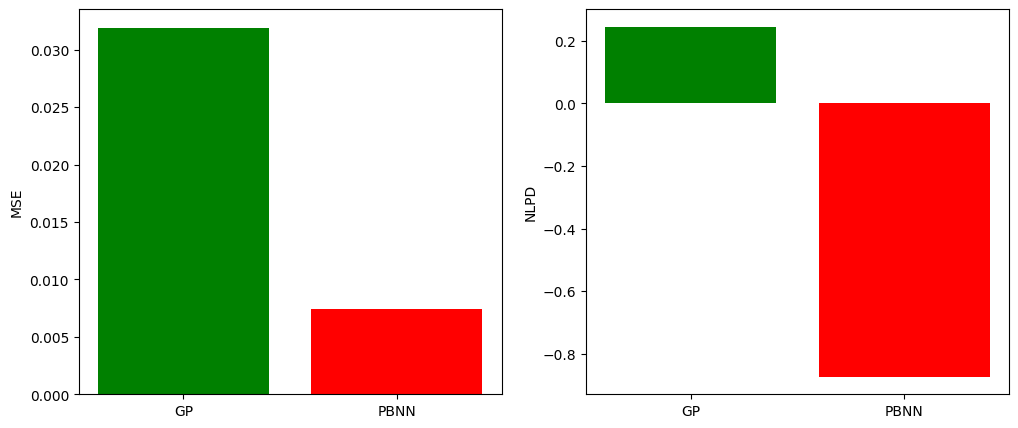

In [8]:
# Labels for the bars
labels = ["GP", "PBNN"]
# MSE and NLPD values
mse_values = [mse_gp, mse_bnn]
nlpd_values = [nlpd_gp, nlpd_bnn]
# Colors for each model
colors = ['green', 'red']
# Plot
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(labels, mse_values, color=colors)
ax1.set_ylabel("MSE")
ax2.bar(labels, nlpd_values, color=colors)
ax2.set_ylabel("NLPD")
plt.show()